# **Pandas**

## **Series and Dataframe structures**

### **Pandas Series**

We'll start analyzing "[The Group of Seven](https://en.wikipedia.org/wiki/Group_of_Seven)". Which is a political formed by Canada, France, Germany, Italy, Japan, the United Kingdom and the United States. We'll start by analyzing population, and for that, we'll use a `pandas.Series` object.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# In millions
g7_pop = pd.Series([35.467, 63.951, 80.940, 60.665, 127.061, 64.511, 318.523])

In [ ]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
dtype: float64

Someone might not know we're representing population in millions of inhabitants. Series can have a `name`, to better document the purpose of the Series:

In [ ]:
g7_pop.name = 'G7 Population in millions'

In [ ]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in millions, dtype: float64

Series are pretty similar to numpy arrays:

In [ ]:
g7_pop.dtype

dtype('float64')

In [ ]:
g7_pop.values

array([ 35.467,  63.951,  80.94 ,  60.665, 127.061,  64.511, 318.523])

They're actually backed by numpy arrays:

In [ ]:
type(g7_pop.values)

numpy.ndarray

And they _look_ like simple Python lists or Numpy Arrays. But they're actually more similar to Python `dict`s.

A Series has an `index`, that's similar to the automatic index assigned to Python's lists:

In [ ]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in millions, dtype: float64

In [ ]:
g7_pop[0]

35.467

In [ ]:
g7_pop[1]

63.951

In [ ]:
g7_pop.index

RangeIndex(start=0, stop=7, step=1)

In [ ]:
l = ['a', 'b', 'c']

But, in contrast to lists, we can explicitly define the index:

In [ ]:
g7_pop.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

In [ ]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

Compare it with the [following table](https://docs.google.com/spreadsheets/d/1IlorV2-Oh9Da1JAZ7weVw86PQrQydSMp-ydVMH135iI/edit?usp=sharing): 

<img width="350" src="https://user-images.githubusercontent.com/872296/38149656-b5ce9816-3431-11e8-88e4-195756e25355.png" />

We can say that Series look like "ordered dictionaries". We can actually create Series out of dictionaries:

In [ ]:
pd.Series({
    'Canada': 35.467,
    'France': 63.951,
    'Germany': 80.94,
    'Italy': 60.665,
    'Japan': 127.061,
    'United Kingdom': 64.511,
    'United States': 318.523
}, name='G7 Population in millions')

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [ ]:
pd.Series(
    [35.467, 63.951, 80.94, 60.665, 127.061, 64.511, 318.523],
    index=['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
    name='G7 Population in millions')

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

You can also create Series out of other series, specifying indexes:

In [ ]:
pd.Series(g7_pop, index=['France', 'Germany', 'Italy', 'Spain'])

France     63.951
Germany    80.940
Italy      60.665
Spain         NaN
Name: G7 Population in millions, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### **Indexing**

Indexing works similarly to lists and dictionaries, you use the **index** of the element you're looking for:

In [ ]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [ ]:
g7_pop['Canada']

35.467

In [ ]:
g7_pop['Japan']

127.061

Numeric positions can also be used, with the `iloc` attribute:

In [ ]:
g7_pop.iloc[0]

35.467

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### **Pandas DataFrames**

Pandas is a high-level data manipulation tool developed by Wes McKinney. It is built on the **Numpy** package and its key data structure is called the **DataFrame**. 


In [2]:
import numpy as np
import pandas as pd

### **Using series as an input into DataFrame**


In [3]:
record1 = pd.Series({"Name": "Ermin",
                                      "Class": "Physics",
                                      "Score": 85})
record1

Name       Ermin
Class    Physics
Score         85
dtype: object

In [4]:
record2 = pd.Series({"Name": "John",
                                      "Class": "Math",
                                      "Score": 87})
record2

Name     John
Class    Math
Score      87
dtype: object

In [5]:
df = pd.DataFrame([record1, record2], index=['school1', 'school2'])
df

,Name,Class,Score
school1,Ermin,Physics,85
school2,John,Math,87


In [6]:
df.head(1)   # gives first row, can enter 5, 10 etc.

,Name,Class,Score
school1,Ermin,Physics,85


In [7]:
type(df)

pandas.core.frame.DataFrame

We'll keep our analysis of G7 countries and looking now at DataFrames. As said, a DataFrame looks a lot like a table (as the one you can appreciate [here](https://docs.google.com/spreadsheets/d/1IlorV2-Oh9Da1JAZ7weVw86PQrQydSMp-ydVMH135iI/edit?usp=sharing)):

<img width="700" src="https://user-images.githubusercontent.com/872296/38153492-72c032ca-3443-11e8-80f4-9de9060a5127.png" />

Creating `DataFrame`s manually can be tedious. 99% of the time you'll be pulling the data from a Database, a csv file or the web. But still, you can create a DataFrame by specifying the columns and values:

In [ ]:
df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.94 , 60.665, 127.061, 64.511, 318.523],
    'GDP': [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039,
        17348075
    ],
    'Surface Area': [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    'HDI': [
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    'Continent': [
        'America',
        'Europe',
        'Europe',
        'Europe',
        'Asia',
        'Europe',
        'America'
    ]
}, columns=['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])

_(The `columns` attribute is optional. I'm using it to keep the same order as in the picture above)_

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


`DataFrame`s also have indexes. As you can see in the "table" above, pandas has assigned a numeric, autoincremental index automatically to each "row" in our DataFrame. In our case, we know that each row represents a country, so we'll just reassign the index:

In [ ]:
df.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.columns

Index(['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'], dtype='object')

In [ ]:
df.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to United States
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    7 non-null      float64
 1   GDP           7 non-null      int64  
 2   Surface Area  7 non-null      int64  
 3   HDI           7 non-null      float64
 4   Continent     7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 336.0+ bytes


In [ ]:
df.size

35

In [ ]:
df.shape

(7, 5)

In [ ]:
df.describe()

,Population,GDP,Surface Area,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


In [ ]:
df.dtypes

Population      float64
GDP               int64
Surface Area      int64
HDI             float64
Continent        object
dtype: object

In [ ]:
df.dtypes.value_counts()

float64    2
int64      2
object     1
dtype: int64

**DataFrames** allow you to store and manipulate tabular data in rows of observations and columns of variables.

There are several ways to create a **DataFrame**. One way way is to use a dictionary.

In [ ]:
dict = {"country": ["Brazil", "Russia", "India", "China", "South Africa"],
       "capital": ["Brasilia", "Moscow", "New Dehli", "Beijing", "Pretoria"],
       "area": [8.516, 17.10, 3.286, 9.597, 1.221],
       "population": [200.4, 143.5, 1252, 1357, 52.98] }

import pandas as pd
brics = pd.DataFrame(dict)
print(brics)

        country    capital    area  population
0        Brazil   Brasilia   8.516      200.40
1        Russia     Moscow  17.100      143.50
2         India  New Dehli   3.286     1252.00
3         China    Beijing   9.597     1357.00
4  South Africa   Pretoria   1.221       52.98


As you can see with the **new brics DataFrame** below, Pandas has assigned a **key** for each country as the numerical values 0 through 4. 

If you would like to have different **index values**, ie. two letter country code, you can do that:

In [ ]:
# Set the index for brics
brics.index = ["BR", "RU", "IN", "CH", "SA"]

# Print out brics with new index values
print(brics)

         country    capital    area  population
BR        Brazil   Brasilia   8.516      200.40
RU        Russia     Moscow  17.100      143.50
IN         India  New Dehli   3.286     1252.00
CH         China    Beijing   9.597     1357.00
SA  South Africa   Pretoria   1.221       52.98


Another way to create a **DataFrame** is by **importing** a **csv file** using Pandas. 

The csv **cars.csv** is stored and can be imported using **pd.read_csv**:

In [ ]:
# Import pandas as pd
import pandas as pd

# Import the cars.csv data: cars
cars = pd.read_csv('/content/drive/MyDrive/Python Bootcamp - Data Analysis/Data Analysis with Python/Numpy and Pandas support files/cars.csv')

# Print out cars
print(cars)

        cars_per_cap         country drives_right
0   US           809   United States         True
1  AUS           731       Australia        False
2  JAP           588           Japan        False
3   IN            18           India        False
4   RU           200          Russia         True
5  MOR            70         Morocco         True
6   EG            45           Egypt         True


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### **Indexing**

Indexing works similarly to lists and dictionaries, you use the **index** of the element you're looking for:

In [ ]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [ ]:
g7_pop['Canada']

35.467

In [ ]:
g7_pop['Japan']

127.061

Numeric positions can also be used, with the `iloc` attribute:

In [ ]:
g7_pop.iloc[0]

35.467

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


#### **Indexing, Selection and Slicing**


##### **Indexing DataFrames**

There are several ways to **index** a Pandas **DataFrame**. One of the easiest ways to do this is by using square bracket notation **[ ]**.

**Eg.** you can use square brackets **[ ]** to select one column of the **cars DataFrame**. You can either use a single bracket or a double bracket. 

    A single bracket will output a Pandas Series 

    A double bracket will output a Pandas DataFrame.

In [ ]:
# Import pandas and cars.csv
import pandas as pd
cars = pd.read_csv('/content/drive/MyDrive/Python Bootcamp - Data Analysis/Data Analysis with Python/Numpy and Pandas support files/cars.csv', index_col = 0)

# Print out country column as Pandas Series
print(cars['country'])

# Print out country column as Pandas DataFrame
print(cars[['country']])

# Print out DataFrame with country and drives_right columns
print(cars[['country', 'drives_right']])

 
US      United States
AUS         Australia
JAP             Japan
IN              India
RU             Russia
MOR           Morocco
EG              Egypt
Name: country, dtype: object
            country
                   
US    United States
AUS       Australia
JAP           Japan
IN            India
RU           Russia
MOR         Morocco
EG            Egypt
            country drives_right
                                
US    United States         True
AUS       Australia        False
JAP           Japan        False
IN            India        False
RU           Russia         True
MOR         Morocco         True
EG            Egypt         True


You can also use loc and iloc to perform just about any data selection operation. 
loc is label-based, which means that you have to specify rows and columns based on 
their row and column labels. iloc is integer index based, so you have to specify 
rows and columns by their integer index.

In [ ]:
# Import cars data
import pandas as pd

cars = pd.read_csv('/content/drive/MyDrive/Python Bootcamp - Data Analysis/Data Analysis with Python/Numpy and Pandas support files/cars.csv', index_col = 0)

# Print out observation for Japan
print(cars.iloc[2])

# Print out observations for Australia and Egypt
print(cars.loc[['AUS', 'EG']])

cars_per_cap       588
country          Japan
drives_right     False
Name: JAP, dtype: object
     cars_per_cap     country drives_right
                                          
AUS           731   Australia        False
EG             45       Egypt         True



Individual columns in the DataFrame can be selected with regular indexing. Each column is represented as a `Series`:

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.loc['Canada']

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [ ]:
df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [ ]:
df['Population']

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: Population, dtype: float64

Note that the `index` of the returned Series is the same as the DataFrame one. And its `name` is the name of the column. If you're working on a notebook and want to see a more DataFrame-like format you can use the `to_frame` method:

In [ ]:
df['Population'].to_frame()

Multiple columns can also be selected similarly to `numpy` and `Series`:

In [ ]:
df[['Population', 'GDP']]

In this case, the result is another `DataFrame`. Slicing works differently, it acts at "row level", and can be counter intuitive:

In [ ]:
df[1:3]

Row level selection works better with `loc` and `iloc` **which are recommended** over regular "direct slicing" (`df[:]`).

`loc` selects rows matching the given index:

In [ ]:
df.loc['Italy']

Population       60.665
GDP             2167744
Surface Area     301336
HDI               0.873
Continent        Europe
Name: Italy, dtype: object

In [ ]:
df.loc['France': 'Italy']

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe


As a second "argument", you can pass the column(s) you'd like to select:

In [ ]:
df.loc['France': 'Italy', 'Population']

France     63.951
Germany    80.940
Italy      60.665
Name: Population, dtype: float64

In [ ]:
df.loc['France': 'Italy', ['Population', 'GDP']]

,Population,GDP
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744


`iloc` works with the (numeric) "position" of the index:

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.iloc[0]

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [ ]:
df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [ ]:
df.iloc[[0, 1, -1]]

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.iloc[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


In [ ]:
df.iloc[1:3, 3]

France     0.888
Germany    0.916
Name: HDI, dtype: float64

In [ ]:
df.iloc[1:3, [0, 3]]

In [ ]:
df.iloc[1:3, 1:3]

> **RECOMMENDED: Always use `loc` and `iloc` to reduce ambiguity, specially with `DataFrame`s with numeric indexes.**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


##### **Conditional selection (boolean arrays)**

We saw conditional selection applied to `Series` and it'll work in the same way for `DataFrame`s. After all, a `DataFrame` is a collection of `Series`:

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df['Population'] > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: Population, dtype: bool

In [ ]:
df.loc[df['Population'] > 70]

,Population,GDP,Surface Area,HDI,Continent
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United States,318.523,17348075,9525067,0.915,America


The boolean matching is done at Index level, so you can filter by any row, as long as it contains the right indexes. Column selection still works as expected:

In [ ]:
df.loc[df['Population'] > 70, 'Population']

Germany           80.940
Japan            127.061
United States    318.523
Name: Population, dtype: float64

In [ ]:
df.loc[df['Population'] > 70, ['Population', 'GDP']]

,Population,GDP
Germany,80.940,3874437
Japan,127.061,4602367
United States,318.523,17348075


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


##### **Dropping stuff**

Opposed to the concept of selection, we have "dropping". Instead of pointing out which values you'd like to _select_ you could point which ones you'd like to `drop`:

In [ ]:
df.drop('Canada')

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.drop(['Canada', 'Japan'])

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.drop(columns=['Population', 'HDI'])

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [ ]:
df.drop(['Italy', 'Canada'], axis=0)

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.drop(['Population', 'HDI'], axis=1)

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [ ]:
df.drop(['Population', 'HDI'], axis=1)

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [ ]:
df.drop(['Population', 'HDI'], axis='columns')

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [ ]:
df.drop(['Canada', 'Germany'], axis='rows')

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


All these `drop` methods return a new `DataFrame`. If you'd like to modify it "in place", you can use the `inplace` attribute (there's an example below).

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


##### **Operations**

In [ ]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In [ ]:
df[['Population', 'GDP']] / 100

,Population,GDP
Canada,0.35467,17853.87
France,0.63951,28336.87
Germany,0.80940,38744.37
Italy,0.60665,21677.44
Japan,1.27061,46023.67
United Kingdom,0.64511,29500.39
United States,3.18523,173480.75


**Operations with Series** work at a column level, broadcasting down the rows (which can be counter intuitive).

In [ ]:
crisis = pd.Series([-1_000_000, -0.3], index=['GDP', 'HDI'])
crisis

GDP   -1000000.0
HDI         -0.3
dtype: float64

In [ ]:
df[['GDP', 'HDI']]

,GDP,HDI
Canada,1785387,0.913
France,2833687,0.888
Germany,3874437,0.916
Italy,2167744,0.873
Japan,4602367,0.891
United Kingdom,2950039,0.907
United States,17348075,0.915


In [ ]:
df[['GDP', 'HDI']] + crisis

,GDP,HDI
Canada,785387.0,0.613
France,1833687.0,0.588
Germany,2874437.0,0.616
Italy,1167744.0,0.573
Japan,3602367.0,0.591
United Kingdom,1950039.0,0.607
United States,16348075.0,0.615


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### **Modifying DataFrames**

It's simple and intuitive, You can add columns, or replace values for columns without issues:

##### **Adding a new column**

In [ ]:
langs = pd.Series(
    ['French', 'German', 'Italian'],
    index=['France', 'Germany', 'Italy'],
    name='Language'
)

In [ ]:
langs

France      French
Germany     German
Italy      Italian
Name: Language, dtype: object

In [ ]:
df['Language'] = langs

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,80.940,3874437,357114,0.916,Europe,German
Italy,60.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,NaN
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,NaN


##### **Replacing values per column**

In [ ]:
df['Language'] = 'English'

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
United Kingdom,64.511,2950039,242495,0.907,Europe,English
United States,318.523,17348075,9525067,0.915,America,English


##### **Renaming Columns**


In [ ]:
df.rename(
    columns={
        'HDI': 'Human Development Index',
        'Anual Popcorn Consumption': 'APC'
    }, index={
        'United States': 'USA',
        'United Kingdom': 'UK',
        'Argentina': 'AR'
    })

,Population,GDP,Surface Area,Human Development Index,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
UK,64.511,2950039,242495,0.907,Europe,English
USA,318.523,17348075,9525067,0.915,America,English


In [ ]:
df.rename(index=str.upper)

In [ ]:
df.rename(index=lambda x: x.lower())

##### **Dropping columns**

In [ ]:
df.drop(columns='Language', inplace=True)

##### **Adding values**

In [ ]:
df.append(pd.Series({
    'Population': 3,
    'GDP': 5
}, name='China'))

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387.0,9984670.0,0.913,America,English
France,63.951,2833687.0,640679.0,0.888,Europe,English
Germany,80.940,3874437.0,357114.0,0.916,Europe,English
Italy,60.665,2167744.0,301336.0,0.873,Europe,English
Japan,127.061,4602367.0,377930.0,0.891,Asia,English
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe,English
United States,318.523,17348075.0,9525067.0,0.915,America,English
China,3.000,5.0,NaN,NaN,NaN,NaN


Append returns a new `DataFrame`:

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
United Kingdom,64.511,2950039,242495,0.907,Europe,English
United States,318.523,17348075,9525067,0.915,America,English


You can directly set the new index and values to the `DataFrame`:

In [ ]:
df.loc['China'] = pd.Series({'Population': 1_400_000_000, 'Continent': 'Asia'})

In [ ]:
df

We can use `drop` to just remove a row by index:

In [ ]:
df.drop('China', inplace=True)

In [ ]:
df

##### **More radical index changes**

In [ ]:
df.reset_index()

In [ ]:
df.set_index('Population')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


#### **Creating columns from other columns**

Altering a DataFrame often involves combining different columns into another. For example, in our Countries analysis, we could try to calculate the "GDP per capita", which is just, `GDP / Population`.

In [ ]:
df[['Population', 'GDP']]

The regular pandas way of expressing that, is just dividing each series:

In [ ]:
df['GDP'] / df['Population']

Canada            50339.385908
France            44310.284437
Germany           47868.013343
Italy             35733.025633
Japan             36221.712406
United Kingdom    45729.239975
United States     54464.120330
China                      NaN
dtype: float64

The result of that operation is just another series that you can add to the original `DataFrame`:

In [ ]:
df['GDP Per Capita'] = df['GDP'] / df['Population']

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent,Language,GDP Per Capita
Canada,3.546700e+01,1785387.0,9984670.0,0.913,America,English,50339.385908
France,6.395100e+01,2833687.0,640679.0,0.888,Europe,English,44310.284437
Germany,8.094000e+01,3874437.0,357114.0,0.916,Europe,English,47868.013343
Italy,6.066500e+01,2167744.0,301336.0,0.873,Europe,English,35733.025633
Japan,1.270610e+02,4602367.0,377930.0,0.891,Asia,English,36221.712406
United Kingdom,6.451100e+01,2950039.0,242495.0,0.907,Europe,English,45729.239975
United States,3.185230e+02,17348075.0,9525067.0,0.915,America,English,54464.120330
China,1.400000e+09,NaN,NaN,NaN,Asia,NaN,NaN


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


#### **Statistical info**

You've already seen the `describe` method, which gives you a good "summary" of the `DataFrame`. Let's explore other methods in more detail:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Pandas can easily read data stored in different file formats like CSV, JSON, XML or even Excel. Parsing always involves specifying the correct structure, encoding and other details. The `read_csv` method reads CSV files and accepts many parameters.

In [ ]:
pd.read_csv?

In [ ]:
df = pd.read_csv('data/btc-market-price.csv')

In [ ]:
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


The CSV file we're reading has only two columns: `timestamp` and `price`. It doesn't have a header, it contains whitespaces and has values separated by commas. pandas automatically assigned the first row of data as headers, which is incorrect. We can overwrite this behavior with the `header` parameter:

In [ ]:
df = pd.read_csv('data/btc-market-price.csv', header=None)

In [ ]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


We can then set the names of each column explicitely by setting the `df.columns` attribute:

In [ ]:
df.columns = ['Timestamp', 'Price']

In [ ]:
df.shape

(365, 2)

In [ ]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [ ]:
df.tail(3)

,Timestamp,Price
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


The type of the `Price` column was correctly interpreted as `float`, but the `Timestamp` was interpreted as a regular string (`object` in pandas notation):

In [ ]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

We can perform a vectorized operation to parse all the Timestamp values as `Datetime` objects:

In [ ]:
pd.to_datetime(df['Timestamp']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [ ]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

The timestamp looks a lot like the index of this `DataFrame`: `date > price`. We can change the autoincremental ID generated by pandas and use the `Timestamp DS` column as the Index:

In [ ]:
df.set_index('Timestamp', inplace=True)

In [ ]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [ ]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


#### **Putting everything together**

And now, we've finally arrived to the final, desired version of the `DataFrame` parsed from our CSV file. The steps were:

In [ ]:
df = pd.read_csv('data/btc-market-price.csv', header=None)
df.columns = ['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [ ]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


**There should be a better way**. And there is 😎. And there usually is, explicitly with all these repetitive tasks with pandas.

The `read_csv` function is extremely powerful and you can specify many more parameters at import time. We can achive the same results with only one line by doing:

In [ ]:
df = pd.read_csv(
    'data/btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)

In [ ]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [ ]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Series vs. DataFrame**

Series is a one dimentional list and a dataframe is essentially a table.

In [9]:
s = pd.Series([1,2,3,4,5])
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

The key thing to note here, is that we dont have a column name.

In [ ]:
pd.Series([30,35,40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

In [ ]:
df = pd.DataFrame({'High' : [20,10,40, 23, 34],
                   'Low': [14, 18, 12, 19, 25]},
                  index=['Austin', 'Los Angeles', 'Seattle', 'Nashville', 'Salt Lake City'])

df

,High,Low
Austin,20,14
Los Angeles,10,18
Seattle,40,12
Nashville,23,19
Salt Lake City,34,25


In [ ]:
my_dict = {'a': 1, 'aa' : 2}, {'b': 3}, {'c': 4}
my_dict

({'a': 1, 'aa': 2}, {'b': 3}, {'c': 4})

In [ ]:
s = pd.Series(my_dict)

In [ ]:
s

0    {'a': 1, 'aa': 2}
1             {'b': 3}
2             {'c': 4}
dtype: object

In [ ]:
df = pd.DataFrame(my_dict)
df

,a,aa,b,c
0,1.0,2.0,NaN,NaN
1,NaN,NaN,3.0,NaN
2,NaN,NaN,NaN,4.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


### Reading in TSLA Dataset

In [ ]:
tsla = pd.read_csv('/content/drive/MyDrive/Python Bootcamp - Data Analysis/Data Analysis with Python/Numpy and Pandas support files/Allison numpy pandas support data/Course Resource/TSLA.csv')
tsla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-18,255.050003,255.750000,251.889999,253.539993,253.539993,4764500
1,2019-07-19,255.690002,259.959991,254.619995,258.179993,258.179993,7048400
2,2019-07-22,258.750000,262.149994,254.190002,255.679993,255.679993,6842400
3,2019-07-23,256.709991,260.480011,254.500000,260.170013,260.170013,5023100
4,2019-07-24,259.170013,266.070007,258.160004,264.880005,264.880005,11072800
...,...,...,...,...,...,...,...
248,2020-07-13,1659.000000,1794.989990,1471.109985,1497.060059,1497.060059,38985400
249,2020-07-14,1556.000000,1590.000000,1431.000000,1516.800049,1516.800049,23418100
250,2020-07-15,1543.000000,1550.000000,1457.000000,1546.010010,1546.010010,16367800
251,2020-07-16,1477.160034,1531.709961,1466.000000,1500.640015,1500.640015,14300800


In [ ]:
tsla.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-18,255.050003,255.750000,251.889999,253.539993,253.539993,4764500
1,2019-07-19,255.690002,259.959991,254.619995,258.179993,258.179993,7048400
2,2019-07-22,258.750000,262.149994,254.190002,255.679993,255.679993,6842400
3,2019-07-23,256.709991,260.480011,254.500000,260.170013,260.170013,5023100
4,2019-07-24,259.170013,266.070007,258.160004,264.880005,264.880005,11072800
5,2019-07-25,233.500000,234.500000,225.550003,228.820007,228.820007,22418300
6,2019-07-26,226.919998,230.259995,222.250000,228.039993,228.039993,10027700
7,2019-07-29,227.089996,235.940002,226.029999,235.770004,235.770004,9273300
8,2019-07-30,232.899994,243.360001,232.179993,242.259995,242.259995,8109000
9,2019-07-31,243.000000,246.679993,236.649994,241.610001,241.610001,9178200


In [ ]:
column_names = tsla.columns
print(column_names)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
tsla.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


### Data Selection with iloc (Index based selection)

In [ ]:
tsla.iloc[0]

Date         2019-07-18
Open         255.050003
High             255.75
Low          251.889999
Close        253.539993
Adj Close    253.539993
Volume          4764500
Name: 0, dtype: object

In [ ]:
tsla.iloc[0][1]

255.050003

In [ ]:
tsla.iloc[[0,1,3], 0]

0    2019-07-18
1    2019-07-19
3    2019-07-23
Name: Date, dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


### Data Selection with loc (Labelled Based Selection)

In [ ]:
tsla.loc[0]['Close']

253.539993

In [ ]:
tsla.set_index('Date', inplace=True)

In [ ]:
tsla.loc['2019-07-22', 'Close']

255.679993

In [ ]:
tsla.loc['2019-07-18', ['Close', 'High', 'Low', 'Volume']]

Close     2.535400e+02
High      2.557500e+02
Low       2.518900e+02
Volume    4.764500e+06
Name: 2019-07-18, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


### **Conditional Selection**

In [ ]:
bc = pd.read_csv('/content/drive/MyDrive/Python Bootcamp - Data Analysis/Data Analysis with Python/Numpy and Pandas support files/Allison numpy pandas support data/Course Resource/bcwisconsin.csv', index_col=0)
bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


In [ ]:
bc.area_mean >= 1300

id
842302      False
842517       True
84300903    False
84348301    False
84358402    False
            ...  
926424       True
926682      False
926954      False
927241      False
92751       False
Name: area_mean, Length: 569, dtype: bool

In [ ]:
bc.loc[bc.area_mean >= 1300]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
851509,M,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,...,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526,NaN
8611555,M,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,...,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,NaN
86355,M,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,...,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,NaN
865423,M,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,NaN
8712289,M,23.27,22.04,152.1,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,...,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187,NaN
873592,M,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.28710,0.18780,0.1800,...,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,NaN
873593,M,21.09,26.57,142.7,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,33.48,176.5,2089.0,0.1491,0.7584,0.6780,0.2903,0.4098,0.12840,NaN
878796,M,23.29,26.67,158.9,1685.0,0.11410,0.20840,0.35230,0.16200,0.2200,...,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762,NaN


In [ ]:
bc.loc[(bc.perimeter_mean >= 150) & (bc.radius_mean >=25)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
8611555,M,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,0.1829,...,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,NaN
873592,M,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,0.1800,...,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,NaN
8810703,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,...,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,NaN
899987,M,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,0.1956,...,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,NaN
911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,...,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427,NaN


In [ ]:
bc.loc[bc.diagnosis.isin(['M'])]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,NaN
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,NaN


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


### **Symmetry**

In [ ]:
bc.symmetry_mean.describe()

count    569.000000
mean       0.181162
std        0.027414
min        0.106000
25%        0.161900
50%        0.179200
75%        0.195700
max        0.304000
Name: symmetry_mean, dtype: float64

In [ ]:
bc.symmetry_mean.mean()

0.18116186291739894

In [ ]:
bc.symmetry_mean.unique()

array([0.2419, 0.1812, 0.2069, 0.2597, 0.1809, 0.2087, 0.1794, 0.2196,
       0.235 , 0.203 , 0.1528, 0.1842, 0.2397, 0.1847, 0.2303, 0.1586,
       0.2164, 0.1582, 0.1885, 0.1967, 0.1815, 0.2521, 0.1769, 0.1995,
       0.304 , 0.2252, 0.1697, 0.1926, 0.1739, 0.2183, 0.2301, 0.2248,
       0.1853, 0.1998, 0.1896, 0.1467, 0.1565, 0.172 , 0.1784, 0.1895,
       0.231 , 0.1974, 0.1746, 0.1907, 0.2128, 0.1675, 0.1495, 0.1353,
       0.1868, 0.2092, 0.1616, 0.192 , 0.1917, 0.2027, 0.1819, 0.1683,
       0.2743, 0.1828, 0.1949, 0.2341, 0.1905, 0.1953, 0.1717, 0.1516,
       0.2111, 0.159 , 0.1902, 0.1927, 0.1662, 0.1798, 0.2403, 0.2152,
       0.2906, 0.1718, 0.1942, 0.1829, 0.1634, 0.2079, 0.2132, 0.2075,
       0.193 , 0.2116, 0.1685, 0.1386, 0.1638, 0.1855, 0.2095, 0.19  ,
       0.135 , 0.162 , 0.1879, 0.1609, 0.1945, 0.2217, 0.1925, 0.1801,
       0.1602, 0.2556, 0.1487, 0.1584, 0.1735, 0.1704, 0.1922, 0.1649,
       0.1688, 0.1305, 0.2157, 0.2096, 0.2129, 0.1667, 0.1966, 0.2655,
      

In [ ]:
bc.symmetry_mean.value_counts()

0.1714    4
0.1769    4
0.1893    4
0.1601    4
0.1717    4
         ..
0.2251    1
0.2200    1
0.1979    1
0.1950    1
0.1587    1
Name: symmetry_mean, Length: 432, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


### **Grouping (power of groupby)**

In [ ]:
bc.groupby('diagnosis').radius_mean.max()

diagnosis
B    17.85
M    28.11
Name: radius_mean, dtype: float64

In [ ]:
bc.groupby('area_mean').radius_mean.min()

area_mean
143.5      6.981
170.4      7.691
178.8      7.729
181.0      7.760
201.9      8.196
           ...  
1878.0    25.220
2010.0    25.730
2250.0    27.220
2499.0    28.110
2501.0    27.420
Name: radius_mean, Length: 539, dtype: float64

In [ ]:
bc.groupby(['diagnosis']).symmetry_mean.agg([len, min, max])

,len,min,max
diagnosis,,,
B,357,0.1060,0.2743
M,212,0.1308,0.3040


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


### **Sorting**

In [ ]:
bc.sort_index()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,...,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019,NaN
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,NaN
8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,...,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472,NaN
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,...,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834,NaN
85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,...,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911157302,M,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,...,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425,NaN
911296201,M,17.08,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,0.1793,...,34.49,152.10,1648.0,0.16000,0.2444,0.2639,0.15550,0.3010,0.09060,NaN
911296202,M,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,0.2061,...,31.37,251.20,4254.0,0.13570,0.4256,0.6833,0.26250,0.2641,0.07427,NaN


In [ ]:
bc.sort_values('diagnosis')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
8912284,B,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,0.1432,...,19.69,92.12,595.6,0.09926,0.2317,0.3344,0.10170,0.1999,0.07127,NaN
9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,15.73,104.50,819.1,0.11260,0.1737,0.1362,0.08178,0.2487,0.06766,NaN
9011495,B,12.21,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.02027,0.1695,...,24.04,93.85,624.6,0.13680,0.2170,0.2413,0.08829,0.3218,0.07470,NaN
9010877,B,13.40,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,0.1650,...,21.70,93.76,663.5,0.12130,0.1676,0.1364,0.06987,0.2741,0.07582,NaN
9010872,B,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,...,25.45,117.20,1009.0,0.13380,0.1679,0.1663,0.09123,0.2394,0.06469,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869691,M,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,...,26.38,91.93,591.7,0.13850,0.4092,0.4504,0.18650,0.5774,0.10300,NaN
9013838,M,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,...,32.82,91.76,508.1,0.21840,0.9379,0.8402,0.25240,0.4154,0.14030,NaN
869104,M,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,...,25.27,129.00,1233.0,0.13140,0.2236,0.2802,0.12160,0.2792,0.08158,NaN


In [ ]:
bc.sort_values(by=['diagnosis', 'texture_mean'])

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
87127,B,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.016980,0.1381,...,12.02,73.66,414.0,0.1436,0.1257,0.10470,0.04603,0.2090,0.07699,NaN
893988,B,11.54,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,0.1833,...,12.87,81.23,467.8,0.1092,0.1626,0.08324,0.04715,0.3390,0.07434,NaN
865137,B,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.026230,0.1667,...,15.97,83.74,510.5,0.1548,0.2390,0.21020,0.08958,0.3016,0.08523,NaN
865432,B,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.057780,0.1856,...,15.98,102.80,745.5,0.1313,0.1788,0.25600,0.12210,0.2889,0.08006,NaN
904647,B,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.017960,0.1601,...,20.14,87.64,589.5,0.1374,0.1575,0.15140,0.06876,0.2460,0.07262,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.094290,0.2128,...,42.79,128.70,915.0,0.1417,0.7917,1.17000,0.23560,0.4089,0.14090,NaN
88995002,M,20.73,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.086460,0.1769,...,47.16,214.00,3432.0,0.1401,0.2644,0.34420,0.16590,0.2868,0.08218,NaN
88119002,M,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.066370,0.1428,...,45.41,180.20,2477.0,0.1408,0.4097,0.39950,0.16250,0.2713,0.07568,NaN


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


### **Check Data Types and Convert**

In [ ]:
bc.diagnosis.dtype

dtype('O')

In [ ]:
bc.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
bc.radius_mean.astype('int64')

id
842302      17
842517      20
84300903    19
84348301    11
84358402    20
            ..
926424      21
926682      20
926954      16
927241      20
92751        7
Name: radius_mean, Length: 569, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


### **Dealing with Missing Values**

In [ ]:
bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


In [ ]:
bc.isna().sum().sum()

569

In [ ]:
# bc.dropna(axis=1, inplace=True)
# bc

In [ ]:
bc.isna().sum().sum()

569

In [ ]:
bc.fillna(0, inplace=True)
bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


In [ ]:
import numpy as np
import pandas as pd

### **Pandas missing data utility functions**

Similarly to `numpy`, pandas also has a few utility functions to identify and detect null values:

In [ ]:
pd.isnull(np.nan)

True

In [ ]:
pd.isnull(None)

True

In [ ]:
pd.isna(np.nan)

True

In [ ]:
pd.isna(None)

True

The opposite ones also exist:

In [ ]:
pd.notnull(None)

False

In [ ]:
pd.notnull(np.nan)

False

In [ ]:
pd.notna(np.nan)

False

In [ ]:
pd.notnull(3)

True

These functions also work with Series and `DataFrame`s:

In [ ]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [ ]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [ ]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


![separator1](https://i.imgur.com/ZUWYTii.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



### Pandas Operations with Missing Values

Pandas manages missing values more gracefully than numpy. `nan`s will no longer behave as "viruses", and operations will just ignore them completely:

In [ ]:
pd.Series([1, 2, np.nan]).count()

In [ ]:
pd.Series([1, 2, np.nan]).sum()

In [ ]:
pd.Series([2, 2, np.nan]).mean()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### **Filtering missing data**

As we saw with numpy, we could combine boolean selection + `pd.isnull` to filter out those `nan`s and null values:

In [ ]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [ ]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [ ]:
pd.notnull(s).sum()

4

In [ ]:
pd.isnull(s).sum()

2

In [ ]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

But both `notnull` and `isnull` are also methods of `Series` and `DataFrame`s, so we could use it that way:

In [ ]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [ ]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

![separator1](https://i.imgur.com/ZUWYTii.png)



#### **Dropping null values**

Boolean selection + `notnull()` seems a little bit verbose and repetitive. And as we said before: any repetitive task will probably have a better, more DRY way. In this case, we can use the `dropna` method:

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [ ]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

#### **Dropping null values on DataFrames**

You saw how simple it is to drop `na`s with a Series. But with `DataFrame`s, there will be a few more things to consider, because you can't drop single values. You can only drop entire columns or rows. Let's start with a sample `DataFrame`:

In [ ]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})

In [ ]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
df.shape

(4, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [ ]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [ ]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

The default `dropna` behavior will drop all the rows in which _any_ null value is present:

In [ ]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In this case we're dropping **rows**. Rows containing null values are dropped from the DF. You can also use the `axis` parameter to drop columns containing null values:

In [ ]:
df.dropna(axis=1)  # axis='columns' also works

,Column D
0,5
1,8
2,34
3,110


In this case, any row or column that contains **at least** one null value will be dropped. Which can be, depending on the case, too extreme. You can control this behavior with the `how` parameter. Can be either `'any'` or `'all'`:

In [ ]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})

In [ ]:
df2

In [ ]:
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
df.dropna(how='any')  # default behavior

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


You can also use the `thresh` parameter to indicate a _threshold_ (a minimum number) of non-null values for the row/column to be kept:

In [ ]:
df

In [ ]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [ ]:
df.dropna(thresh=3, axis='columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


![separator1](https://i.imgur.com/ZUWYTii.png)



#### **Filling null values**

Sometimes instead than dropping the null values, we might need to replace them with some other value. This highly depends on your context and the dataset you're currently working. Sometimes a `nan` can be replaced with a `0`, sometimes it can be replaced with the `mean` of the sample, and some other times you can take the closest value. Again, it depends on the context. We'll show you the different methods and mechanisms and you can then apply them to your own problem.

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

**Filling nulls with a arbitrary value**

In [ ]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [ ]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

**Filling nulls with contiguous (close) values**

The `method` argument is used to fill null values with other values close to that null one:

In [ ]:
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [ ]:
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

This can still leave null values at the extremes of the Series/DataFrame:

In [ ]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [ ]:
pd.Series([1, np.nan, 3, np.nan, np.nan]).fillna(method='bfill')

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

#### **Filling null values on DataFrames**

The `fillna` method also works on `DataFrame`s, and it works similarly. The main differences are that you can specify the `axis` (as usual, rows or columns) to use to fill the values (specially for methods) and that you have more control on the values passed:

In [ ]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


In [ ]:
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [ ]:
df.fillna(method='ffill', axis=1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


![separator1](https://i.imgur.com/ZUWYTii.png)


#### **Checking if there are NAs**

The question is: Does this `Series` or `DataFrame` contain any missing value? The answer should be yes or no: `True` or `False`. How can you verify it?

**Example 1: Checking the length**

If there are missing values, `s.dropna()` will have less elements than `s`:

In [ ]:
s.dropna().count()

In [ ]:
missing_values = len(s.dropna()) != len(s)
missing_values

There's also a `count` method, that excludes `nan`s from its result:

In [ ]:
len(s)

In [ ]:
s.count()

So we could just do:

In [ ]:
missing_values = s.count() != len(s)
missing_values

**More Pythonic solution `any`**

The methods `any` and `all` check if either there's `any` True value in a Series or `all` the values are `True`. They work in the same way as in Python:

In [ ]:
pd.Series([True, False, False]).any()

True

In [ ]:
pd.Series([True, False, False]).all()

False

In [ ]:
pd.Series([True, True, True]).all()

True

The `isnull()` method returned a Boolean `Series` with `True` values wherever there was a `nan`:

In [ ]:
s.isnull()

So we can just use the `any` method with the boolean array returned:

In [ ]:
pd.Series([1, np.nan]).isnull().any()

In [ ]:
pd.Series([1, 2]).isnull().any()

In [ ]:
s.isnull().any()

A more strict version would check only the `values` of the Series:

In [ ]:
s.isnull().values

In [ ]:
s.isnull().values.any()

![separator2](https://i.imgur.com/4gX5WFr.png)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


In [ ]:
df.head()

,Population,GDP,Surface Area,HDI,Continent,Language,GDP Per Capita
Canada,35.467,1785387.0,9984670.0,0.913,America,English,50339.385908
France,63.951,2833687.0,640679.0,0.888,Europe,English,44310.284437
Germany,80.940,3874437.0,357114.0,0.916,Europe,English,47868.013343
Italy,60.665,2167744.0,301336.0,0.873,Europe,English,35733.025633
Japan,127.061,4602367.0,377930.0,0.891,Asia,English,36221.712406


In [ ]:
df.describe()

,Population,GDP,Surface Area,HDI,GDP Per Capita
count,8.000000e+00,7.000000e+00,7.000000e+00,7.000000,7.000000
mean,1.750001e+08,5.080248e+06,3.061327e+06,0.900429,44952.254576
std,4.949747e+08,5.494020e+06,4.576187e+06,0.016592,6954.983875
min,3.546700e+01,1.785387e+06,2.424950e+05,0.873000,35733.025633
25%,6.312950e+01,2.500716e+06,3.292250e+05,0.889500,40265.998421
50%,7.272550e+01,2.950039e+06,3.779300e+05,0.907000,45729.239975
75%,1.749265e+02,4.238402e+06,5.082873e+06,0.914000,49103.699626
max,1.400000e+09,1.734808e+07,9.984670e+06,0.916000,54464.120330


In [ ]:
population = df['Population']

In [ ]:
population.min(), population.max()

In [ ]:
population.sum()

In [ ]:
population.sum() / len(population)

In [ ]:
population.mean()

In [ ]:
population.std()

In [ ]:
population.median()

In [ ]:
population.describe()

In [ ]:
population.quantile(.25)

In [ ]:
population.quantile([.2, .4, .6, .8, 1])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Reading CSV and TXT files

Rather than creating `Series` or `DataFrames` strutures from scratch, or even from Python core sequences or `ndarrays`, the most typical use of **pandas** is based on the loading of information from files or sources of information for further exploration, transformation and analysis.

In this lecture we'll learn how to read comma-separated values files (.csv) and raw text files (.txt) into pandas `DataFrame`s.

In [ ]:
import pandas as pd

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### Reading data with Python

As we saw on previous courses we can read data simply using Python.

When you want to work with a file, the first thing to do is to open it. This is done by invoking the `open()` built-in function.

`open()` has a single required argument that is the path to the file and has a single return, the file object.

The `with` statement automatically takes care of closing the file once it leaves the `with` block, even in cases of error.

In [ ]:
filepath = 'btc-market-price.csv'

with open(filepath, 'r') as reader:
    print(reader)

<_io.TextIOWrapper name='btc-market-price.csv' mode='r' encoding='UTF-8'>


Once the file is opened, we can read its content as follows:

In [ ]:
filepath = 'btc-market-price.csv'

with open(filepath, 'r') as reader:
    for index, line in enumerate(reader.readlines()):
        # read just the first 10 lines
        if (index < 10):
            print(index, line)

0 2/4/17 0:00,1099.169125

1 3/4/17 0:00,1141.813

2 4/4/17 0:00,?

3 5/4/17 0:00,1133.079314

4 6/4/17 0:00,-

5 7/4/17 0:00,-

6 8/4/17 0:00,1181.149838

7 9/4/17 0:00,1208.8005

8 10/4/17 0:00,1207.744875

9 11/4/17 0:00,1226.617038



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### Reading data with Pandas

Probably one of the most recurrent types of work for data analysis: public data sources, logs, historical information tables, exports from databases. So the pandas library offers us functions to read and write files in multiple formats like CSV, JSON, XML and Excel's XLSX, all of them creating a `DataFrame` with the information read from the file.

We'll learn how to read different type of data including:
- CSV files (.csv)
- Raw text files (.txt)
- JSON data from a file and from an API
- Data from a SQL query over a database

There are many other available reading functions as the following table shows:

![pandas read data table](https://user-images.githubusercontent.com/7065401/68400151-51d5c200-0156-11ea-9732-aa00400c8e4b.png)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### The `read_csv` method

The first method we'll learn is **read_csv**, that let us read comma-separated values (CSV) files and raw text (TXT) files into a `DataFrame`.

The `read_csv` function is extremely powerful and you can specify a very broad set of parameters at import time that allow us to accurately configure how the data will be read and parsed by specifying the correct structure, enconding and other details. The most common parameters are as follows:

- `filepath`: Path of the file to be read.
- `sep`: Character(s) that are used as a field separator in the file.
- `header`: Index of the row containing the names of the columns (None if none).
- `index_col`: Index of the column or sequence of indexes that should be used as index of rows of the data.
- `names`: Sequence containing the names of the columns (used together with header = None).
- `skiprows`: Number of rows or sequence of row indexes to ignore in the load.
- `na_values`: Sequence of values that, if found in the file, should be treated as NaN.
- `dtype`: Dictionary in which the keys will be column names and the values will be types of NumPy to which their content must be converted.
- `parse_dates`: Flag that indicates if Python should try to parse data with a format similar to dates as dates. You can enter a list of column names that must be joined for the parsing as a date.
- `date_parser`: Function to use to try to parse dates.
- `nrows`: Number of rows to read from the beginning of the file.
- `skip_footer`: Number of rows to ignore at the end of the file.
- `encoding`: Encoding to be expected from the file read.
- `squeeze`: Flag that indicates that if the data read only contains one column the result is a Series instead of a DataFrame.
- `thousands`: Character to use to detect the thousands separator.
- `decimal`: Character to use to detect the decimal separator.
- `skip_blank_lines`: Flag that indicates whether blank lines should be ignored.

> Full `read_csv` documentation can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html.

In this case we'll try to read our `btc-market-price.csv` CSV file using different parameters to parse it correctly.

This file contains records of the mean price of Bitcoin per date.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Reading our first CSV file

Everytime we call `read_csv` method, we'll need to pass an explicit `filepath` parameter indicating the path where our CSV file is.

Any valid string path is acceptable. The string could be a URL. Valid URL schemes include HTTP, FTP, S3, and file. For file URLs, a host is expected. A local file could be: `file://localhost/path/to/table.csv`.

For example we can use `read_csv` method to load data directly from an URL:

In [ ]:
csv_url = "https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv"

pd.read_csv(csv_url).head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


Or just use a local file:

In [ ]:
df = pd.read_csv('btc-market-price.csv')

df.head()

,2/4/17 0:00,1099.169125
0,3/4/17 0:00,1141.813
1,4/4/17 0:00,?
2,5/4/17 0:00,1133.079314
3,6/4/17 0:00,-
4,7/4/17 0:00,-


In this case we let pandas infer everything related to our data, but in most of the cases we'll need to explicitly tell pandas how we want our data to be loaded. To do that we use parameters.

Let's see how theses parameters work.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### First row behaviour with `header` parameter

The CSV file we're reading has only two columns: `Timestamp` and `Price`. It doesn't have a header. Pandas automatically assigned the first row of data as headers, which is incorrect. We can overwrite this behavior with the `header` parameter.

In [ ]:
df = pd.read_csv('btc-market-price.csv',
                 header=None)

In [ ]:
df.head()

,0,1
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813
2,4/4/17 0:00,?
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,-


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Missing values with `na_values` parameter

We can define a `na_values` parameter with the values we want to be recognized as NA/NaN. In this case empty strings `''`, `?` and `-` will be recognized as null values.

In [ ]:
df = pd.read_csv('btc-market-price.csv',
                 header=None,
                 na_values=['', '?', '-'])

In [ ]:
df.head()

,0,1
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813000
2,4/4/17 0:00,NaN
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,NaN


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Column names using `names` parameter

We'll add that columns names using the `names` parameter. 

In [ ]:
df = pd.read_csv('btc-market-price.csv',
                 header=None,
                 na_values=['', '?', '-'],
                 names=['Timestamp', 'Price'])

In [ ]:
df.head()

,Timestamp,Price
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813000
2,4/4/17 0:00,NaN
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,NaN


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Column types using `dtype` parameter


Without using the `dtype` parameter pandas will try to figure it out the type of each column automatically. We can use `dtype` parameter to force pandas to use certain dtype.

In this case we'll force the `Price` column to be `float`.

In [ ]:
df = pd.read_csv('btc-market-price.csv',
                 header=None,
                 na_values=['', '?', '-'],
                 names=['Timestamp', 'Price'],
                 dtype={'Price': 'float'})

In [ ]:
df.head()

,Timestamp,Price
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813000
2,4/4/17 0:00,NaN
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,NaN


In [ ]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

The `Timestamp` column was interpreted as a regular string (`object` in pandas notation), we can parse it manually using a vectorized operation as we saw on previous courses.

We'll parse `Timestamp` column to `Datetime` objects using `to_datetime` method:

In [ ]:
pd.to_datetime(df['Timestamp']).head()

0   2017-02-04
1   2017-03-04
2   2017-04-04
3   2017-05-04
4   2017-06-04
Name: Timestamp, dtype: datetime64[ns]

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
df.head()

,Timestamp,Price
0,2017-02-04,1099.169125
1,2017-03-04,1141.813000
2,2017-04-04,NaN
3,2017-05-04,1133.079314
4,2017-06-04,NaN


In [ ]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Date parser using `parse_dates` parameter

Another way of dealing with `Datetime` objects is using `parse_dates` parameter with the position of the columns with dates.

In [ ]:
df = pd.read_csv('btc-market-price.csv',
                 header=None,
                 na_values=['', '?', '-'],
                 names=['Timestamp', 'Price'],
                 dtype={'Price': 'float'},
                 parse_dates=[0])

In [ ]:
df.head()

,Timestamp,Price
0,2017-02-04,1099.169125
1,2017-03-04,1141.813000
2,2017-04-04,NaN
3,2017-05-04,1133.079314
4,2017-06-04,NaN


In [ ]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Adding index to our data using `index_col` parameter

By default, pandas will automatically assign a numeric autoincremental index or row label starting with zero. You may want to leave the default index as such if your data doesn’t have a column with unique values that can serve as a better index. In case there is a column that you feel would serve as a better index, you can override the default behavior by setting `index_col` property to a column. It takes a numeric value representing the index or a string of the column name for setting a single column as index or a list of numeric values or strings for creating a multi-index.

In our data, we are choosing the first column, `Timestamp`, as index (index=0) by passing zero to the `index_col` argument.

In [ ]:
df = pd.read_csv('btc-market-price.csv',
                 header=None,
                 na_values=['', '?', '-'],
                 names=['Timestamp', 'Price'],
                 dtype={'Price': 'float'},
                 parse_dates=[0],
                 index_col=[0])

In [ ]:
df.head()

,Price
Timestamp,
2017-02-04,1099.169125
2017-03-04,1141.813000
2017-04-04,NaN
2017-05-04,1133.079314
2017-06-04,NaN


In [ ]:
df.dtypes

Price    float64
dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### A more challenging parsing

Now we'll read another CSV file. This file has the following columns:

- `first_name`
- `last_name`
- `age`
- `math_score`
- `french_score`
- `next_test_date`

Let's read it and see how it looks like.

In [ ]:
exam_df = pd.read_csv('exam_review.csv')

In [ ]:
exam_df

,,first_name>last_name>age>math_score>french_score
"Ray>Morley>18>""68","000"">""75","000"""
Melvin>Scott>24>77>83,NaN,NaN
Amirah>Haley>22>92>67,NaN,NaN
"Gerard>Mills>19>""78","000"">72",NaN
Amy>Grimes>23>91>81,NaN,NaN


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Custom data delimiters using `sep` parameter

We can define which delimiter to use by using the `sep` parameter. If we don't use the `sep` parameter, pandas will automatically detect the separator.

In most of the CSV files separator will be comma (`,`) and will be automatically detected. But we can find files with other separators like semicolon (`;`), tabs (`\t`, specially on TSV files), whitespaces or any other special character.

In this case the separator is a `>` character.

In [ ]:
exam_df = pd.read_csv('exam_review.csv',
                      sep='>')

In [ ]:
exam_df

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,"68,000","75,000"
1,Melvin,Scott,24,77,83
2,Amirah,Haley,22,92,67
3,Gerard,Mills,19,"78,000",72
4,Amy,Grimes,23,91,81


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Custom data encoding

Files are stored using different "encodings". You've probably heard about ASCII, UTF-8, latin1, etc.

While reading data custom encoding can be defined with the `encoding` parameter.

- `encoding='UTF-8'`: will be used if data is UTF-8 encoded.
- `encoding='iso-8859-1'`: will be used if data is ISO/IEC 8859-1 ("extended ASCII") encoded.

In our case we don't need a custom enconding as data is properly loaded.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Custom numeric `decimal` and `thousands` character  

The decimal and thousands characters could change between datasets. If we have a column containing a comma (`,`) to indicate the decimal or thousands place, then this column would be considered a string and not numeric.

In [ ]:
exam_df = pd.read_csv('exam_review.csv',
                      sep='>')

In [ ]:
exam_df

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,"68,000","75,000"
1,Melvin,Scott,24,77,83
2,Amirah,Haley,22,92,67
3,Gerard,Mills,19,"78,000",72
4,Amy,Grimes,23,91,81


In [ ]:
exam_df[['math_score', 'french_score']].dtypes

math_score      object
french_score    object
dtype: object

To solve that, ensuring such columns are interpreted as integer values, we'll need to use the `decimal` and/or `thousands` parameters to indicate correct decimal and/or thousands indicators.

In [ ]:
exam_df = pd.read_csv('exam_review.csv',
                      sep='>',
                      decimal=',')

In [ ]:
exam_df

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,68.0,75.0
1,Melvin,Scott,24,77.0,83.0
2,Amirah,Haley,22,92.0,67.0
3,Gerard,Mills,19,78.0,72.0
4,Amy,Grimes,23,91.0,81.0


In [ ]:
exam_df[['math_score', 'french_score']].dtypes

math_score      float64
french_score    float64
dtype: object

Let's see what happens with the `thousands` parameter:

In [ ]:
pd.read_csv('exam_review.csv',
            sep='>',
            thousands=',')

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,68000,75000
1,Melvin,Scott,24,77,83
2,Amirah,Haley,22,92,67
3,Gerard,Mills,19,78000,72
4,Amy,Grimes,23,91,81


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Excluding specific rows

We can use the `skiprows` to:

- Exclude reading specified number of rows from the beginning of a file, by passing an integer argument. **This removes the header too**.
- Skip reading specific row indices from a file, by passing a list containing row indices to skip.

In [ ]:
exam_df = pd.read_csv('exam_review.csv',
                      sep='>',
                      decimal=',')

In [ ]:
exam_df

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,68.0,75.0
1,Melvin,Scott,24,77.0,83.0
2,Amirah,Haley,22,92.0,67.0
3,Gerard,Mills,19,78.0,72.0
4,Amy,Grimes,23,91.0,81.0


To skip reading the first 2 rows from this file, we can use `skiprows=2`:

In [ ]:
pd.read_csv('exam_review.csv',
            sep='>',
            skiprows=2)

,Melvin,Scott,24,77,83
0,Amirah,Haley,22,92,67
1,Gerard,Mills,19,"78,000",72
2,Amy,Grimes,23,91,81


As the header is considered as the first row, to skip reading data rows 1 and 3, we can use `skiprows=[1,3]`:

In [ ]:
exam_df = pd.read_csv('exam_review.csv',
                      sep='>',
                      decimal=',',
                      skiprows=[1,3])

In [ ]:
exam_df

,first_name,last_name,age,math_score,french_score
0,Melvin,Scott,24,77.0,83
1,Gerard,Mills,19,78.0,72
2,Amy,Grimes,23,91.0,81


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Get rid of blank lines

The `skip_blank_lines` parameter is set to `True` so blank lines are skipped while we read files.

If we set this parameter to `False`, then every blank line will be loaded with `NaN` values into the `DataFrame`.

In [ ]:
pd.read_csv('exam_review.csv',
            sep='>',
            skip_blank_lines=False)

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18.0,"68,000","75,000"
1,Melvin,Scott,24.0,77,83
2,Amirah,Haley,22.0,92,67
3,NaN,NaN,NaN,NaN,NaN
4,Gerard,Mills,19.0,"78,000",72
5,Amy,Grimes,23.0,91,81


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Loading specific columns

We can use the `usecols` parameter when we want to load just specific columns and not all of them.

Performance wise, it is better because instead of loading an entire dataframe into memory and then deleting the not required columns, we can select the columns that we’ll need, while loading the dataset itself.

As a parameter to `usecols`, you can pass either a list of strings corresponding to the column names or a list of integers corresponding to column index.

In [ ]:
pd.read_csv('exam_review.csv',
            usecols=['first_name', 'last_name', 'age'],
            sep='>')

,first_name,last_name,age
0,Ray,Morley,18
1,Melvin,Scott,24
2,Amirah,Haley,22
3,Gerard,Mills,19
4,Amy,Grimes,23


Or using just the column position:

In [ ]:
pd.read_csv('exam_review.csv',
            usecols=[0, 1, 2],
            sep='>')

,first_name,last_name,age
0,Ray,Morley,18
1,Melvin,Scott,24
2,Amirah,Haley,22
3,Gerard,Mills,19
4,Amy,Grimes,23


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Using a `Series` instead of `DataFrame`

If the parsed data only contains one column then we can return a Series by setting the `squeeze` parameter to `True`.

In [ ]:
exam_test_1 = pd.read_csv('exam_review.csv',
                          sep='>',
                          usecols=['last_name'])

In [ ]:
type(exam_test_1)

pandas.core.frame.DataFrame

In [ ]:
exam_test_2 = pd.read_csv('exam_review.csv',
                          sep='>',
                          usecols=['last_name'],
                          squeeze=True)

In [ ]:
type(exam_test_2)

pandas.core.series.Series

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Save to CSV file

Finally we can also save our `DataFrame` as a CSV file.

In [ ]:
exam_df

,first_name,last_name,age,math_score,french_score
0,Melvin,Scott,24,77.0,83
1,Gerard,Mills,19,78.0,72
2,Amy,Grimes,23,91.0,81


We can simply generate a CSV string from our `DataFrame`:

In [ ]:
exam_df.to_csv()

',first_name,last_name,age,math_score,french_score\n0,Melvin,Scott,24,77.0,83\n1,Gerard,Mills,19,78.0,72\n2,Amy,Grimes,23,91.0,81\n'

Or specify a file path where we want our generated CSV code to be saved:

In [ ]:
exam_df.to_csv('out.csv')

In [ ]:
pd.read_csv('out.csv')

,Unnamed: 0,first_name,last_name,age,math_score,french_score
0,0,Melvin,Scott,24,77.0,83
1,1,Gerard,Mills,19,78.0,72
2,2,Amy,Grimes,23,91.0,81


In [ ]:
exam_df.to_csv('out.csv',
               index=None)

In [ ]:
pd.read_csv('out.csv')

,first_name,last_name,age,math_score,french_score
0,Melvin,Scott,24,77.0,83
1,Gerard,Mills,19,78.0,72
2,Amy,Grimes,23,91.0,81


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



### Reading Excel files

In this lecture we'll learn how to read Excel files (.xlsx) and its sheets into a pandas `DataFrame`s, and how to export that `DataFrame`s to different sheets and Excel files using the pandas `ExcelWriter` and `to_excel` methods.

In [ ]:
import pandas as pd

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### The `read_excel` method

We'll begin with the **read_excel** method, that let us read Excel files into a `DataFrame`.

This method supports both XLS and XLSX file extensions from a local filesystem or URL and has a broad set of parameters to configure how the data will be read and parsed. These parameters are very similar to the parameters we saw on previous lectures where we introduced the `read_csv` method. The most common parameters are as follows:

- `filepath`: Path of the file to be read.
- `sheet_name`: Strings are used for sheet names. Integers are used in zero-indexed sheet positions. Lists of strings/integers are used to request multiple sheets. Specify None to get all sheets.
- `header`: Index of the row containing the names of the columns (None if none).
- `index_col`: Index of the column or sequence of indexes that should be used as index of rows of the data.
- `names`: Sequence containing the names of the columns (used together with header = None).
- `skiprows`: Number of rows or sequence of row indexes to ignore in the load.
- `na_values`: Sequence of values that, if found in the file, should be treated as NaN.
- `dtype`: Dictionary in which the keys will be column names and the values will be types of NumPy to which their content must be converted.
- `parse_dates`: Flag that indicates if Python should try to parse data with a format similar to dates as dates. You can enter a list of column names that must be joined for the parsing as a date.
- `date_parser`: Function to use to try to parse dates.
- `nrows`: Number of rows to read from the beginning of the file.
- `skip_footer`: Number of rows to ignore at the end of the file.
- `squeeze`: Flag that indicates that if the data read only contains one column the result is a Series instead of a DataFrame.
- `thousands`: Character to use to detect the thousands separator.

> Full `read_excel` documentation can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html.

In this case we'll try to read our `products.xlsx` Excel file.

This file contains records of products with its price, brand, description and merchant information on different sheets.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Reading our first Excel file

Everytime we call `read_excel` method, we'll need to pass an explicit `filepath` parameter indicating the path where our Excel file is.

Any valid string path is acceptable. The string could be a URL. Valid URL schemes include HTTP, FTP, S3, and file. For file URLs, a host is expected. A local file could be: `file://localhost/path/to/table.xlsx`.

In [ ]:
df = pd.read_excel('products.xlsx')

In [ ]:
df.head()

,product_id,price,merchant_id,brand,name
0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


In this case we let pandas infer everything related to our data, but in most of the cases we'll need to explicitly tell pandas how we want our data to be loaded. To do that we use parameters.

Let's see how theses parameters work.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### First row behaviour with `header` parameter

The Excel file we're reading has the following columns:

- `product_id`
- `price`
- `merchant_id`
- `brand`
- `name`

The first row (0-index) of the data has that column names, so we keep the implicit `header=0` parameter to let Pandas assign this first row as headers. We can overwrite this behavior defining explicitly the `header` parameter.

In [ ]:
pd.read_excel('products.xlsx').head()

,product_id,price,merchant_id,brand,name
0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


In [ ]:
pd.read_excel('products.xlsx',
              header=None).head()

,0,1,2,3,4
0,product_id,price,merchant_id,brand,name
1,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
2,AVpgMuGwLJeJML43KY_c,69,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
3,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
4,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Adding index to our data using `index_col` parameter

By default, pandas will automatically assign a numeric autoincremental index or row label starting with zero.

You may want to leave the default index as such if your data doesn’t have a column with unique values that can serve as a better index.

In case there is a column that you feel would serve as a better index, you can override the default behavior by setting `index_col` property to a column. It takes a numeric value or a string for setting a single column as index or a list of numeric values for creating a multi-index.

In our data, we are choosing the first column, `product_id`, as index (index=0) by passing zero to the `index_col` argument.

In [ ]:
df = pd.read_excel('products.xlsx',
                   index_col=[0])

In [ ]:
df.head()

,price,merchant_id,brand,name
product_id,,,,
AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Selecting specific sheets

Excel files quite often have multiple sheets and the ability to read a specific sheet or all of them is very important. To make this easy, the pandas `read_excel` method takes an argument called `sheet_name` that tells pandas which sheet to read in the data from.

For this, you can either use the sheet name or the sheet number. Sheet numbers start with zero. The first sheet will be the one loaded by default. You can change sheet by specifying `sheet_name` parameter.

In [ ]:
products = pd.read_excel('products.xlsx',
                         sheet_name='Products',
                         index_col='product_id')

In [ ]:
products.head()

,price,merchant_id,brand,name
product_id,,,,
AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


In [ ]:
merchants = pd.read_excel('products.xlsx',
                          sheet_name='Merchants',
                          index_col='merchant_id')

In [ ]:
merchants.head()

,merchant
merchant_id,
1001,Bestbuy.com
1002,Walmart.com
1003,Bestbuy.com
1004,Growkart
1005,bhphotovideo.com


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### The `ExcelFile` class

Another approach on reading Excel data is using the `ExcelFile` class for parsing tabular Excel sheets into `DataFrame` objects.

This `ExcelFile` will let us work with sheets easily, and will be faster than the previous `read_excel` method.

In [ ]:
excel_file = pd.ExcelFile('products.xlsx')

We can now explore the sheets on that Excel file with `sheet_names`:

In [ ]:
excel_file.sheet_names

['Products', 'Descriptions', 'Merchants']

And parse specified sheet(s) into a Pandas' `DataFrame` using ExcelFile's `parse()` method.

Everytime we call `parse()` method, we'll need to pass an explicit `sheet_name` parameter indicating which sheet from the Excel file we want to be parsed. First sheet will be parsed by default.

In [ ]:
products = excel_file.parse('Products')

In [ ]:
products.head()

,product_id,price,merchant_id,brand,name
0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


This `parse()` method has all the parameters we saw before on `read_excel()` method, let's try some of them:

In [ ]:
products = excel_file.parse(sheet_name='Products',
                            header=0,
                            index_col='product_id')

In [ ]:
products.head()

,price,merchant_id,brand,name
product_id,,,,
AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


In [ ]:
products.dtypes

price          float64
merchant_id      int64
brand           object
name            object
dtype: object

In [ ]:
merchants = excel_file.parse('Merchants',
                             index_col='merchant_id')

In [ ]:
merchants.head()

,merchant
merchant_id,
1001,Bestbuy.com
1002,Walmart.com
1003,Bestbuy.com
1004,Growkart
1005,bhphotovideo.com


In [ ]:
merchants.dtypes

merchant    object
dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Save to Excel file

Finally we can save our `DataFrame` as a Excel file.

In [ ]:
products.head()

,price,merchant_id,brand,name
product_id,,,,
AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


A fast, simple way to write a single `DataFrame` to an Excel file is to use the `to_excel()` method of the `DataFrame` directly.

Note that it's required to pass a output file path.

> The `OpenPyXL - openpyxl` library should be installed in order to save Excel files. `pip install openpyxl`

In [ ]:
products.to_excel('out.xlsx')

In [ ]:
pd.read_excel('out.xlsx').head()

,product_id,price,merchant_id,brand,name
0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


We can specify the sheet name with `sheet_name` parameter:

In [ ]:
products.to_excel('out.xlsx',
                  sheet_name='Products')

Further calls of `to_excel` with different sheet names will only overwrite the first sheet instead of adding additional sheets.

Also, be aware that by removing the index, we'll lose that column.

In [ ]:
products.to_excel('out.xlsx',
                  index=None)

In [ ]:
pd.read_excel('out.xlsx').head()

,price,merchant_id,brand,name
0,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Positioning Data with `startrow` and `startcol`

Suppose we wanted to insert the our data into the spreadsheet file in a position somewhere other than the top-left corner.

We can shift where the `to_excel` method writes the data by using `startrow` to set the cell after which the first row will be printed, and `startcol` to set which cell after which the first column will be printed.

<img src="https://user-images.githubusercontent.com/7065401/68594890-41378b80-0477-11ea-9ae4-ff87e5e1128d.png" />

In [ ]:
products.to_excel('out.xlsx',
                  sheet_name='Products',
                  startrow=1,
                  startcol=2)

<img src="https://user-images.githubusercontent.com/7065401/68594828-249b5380-0477-11ea-87d7-af694c09f2d2.png" />

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Saving multiple sheets

If we wanted to write a single `DataFrame` to a single sheet with default formatting then we are done. However, if we want to write multiple sheets and/or multiple `DataFrame`s, then we will need to create an `ExcelWriter` object.

The `ExcelWriter` object is included in the Pandas module and is used to open Excel files and handle write operations. This object behaves almost exactly like the vanilla Python `open` object that we used on previous courses and can be used within a `with` block.

> When the `ExcelWriter` object is executed, any existing file with the same name as the output file will be overwritten.

In [ ]:
writer = pd.ExcelWriter('out.xlsx')

In [ ]:
writer

Instead of including the file pathname in the `to_excel` call, we will use the `ExcelWriter` object `writer` instead.

In [ ]:
with writer:
    products.to_excel(writer, sheet_name='Products')

In [ ]:
pd.read_excel('out.xlsx', sheet_name='Products').head()

,product_id,price,merchant_id,brand,name
0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


We can now add another `Merchants` sheet simply using the `writer` object:

In [ ]:
with writer:
    merchants.to_excel(writer, sheet_name='Merchants')

In [ ]:
pd.read_excel('out.xlsx', sheet_name='Products').head()

,product_id,price,merchant_id,brand,name
0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


In [ ]:
pd.read_excel('out.xlsx', sheet_name='Merchants').head()

,merchant_id,merchant
0,1001,Bestbuy.com
1,1002,Walmart.com
2,1003,Bestbuy.com
3,1004,Growkart
4,1005,bhphotovideo.com


Or we can save multiple sheets at the same time:

In [ ]:
with pd.ExcelWriter('out.xlsx') as writer:
    products.to_excel(writer, sheet_name='Products')
    merchants.to_excel(writer, sheet_name='Merchants')

In that case the resulting `out.xlxs` file will have two sheets `Products` and `Merchants`.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



### Reading JSON files

In this lecture we'll learn how to read JSON files (.json) into a pandas `DataFrame`, and how to export that `DataFrame` to a JSON file.

In [ ]:
import pandas as pd

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### The `read_json` method

We'll begin with the **read_json** method, that let us read simple JSON files into a `DataFrame`.

This `read_json` method accepts many parameters as we saw on `read_csv` and `read_excel`, such as `filepath`, `dtype` and `encoding`.

> Full `read_json` documentation can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html.

In this case we'll try to read our `games.json` JSON file.

This file contains records of PlayStation games in Europe with its title, price, provider and genre.

In [ ]:
!head -n20 games.json

[
    {
        "title": "Call of Duty®: WWII + Destiny 2 - Lote",
        "price": "129,99 €",
        "content_rating_img": "https://cdn-a.sonyentertainmentnetwork.com/grc/images/ratings/hd/pegi/18.png",
        "release_date": "Dic 21 2018",
        "provider": "Activision Blizzard Int'l BV",
        "genre": "Shooter",
        "image": "https://store.playstation.com/store/api/chihiro/00_09_000/container/ES/es/999/EP0002-CUSA08633_00-CODWWIIANDD2BASE/1516962740000/image?w=240&h=240&bg_color=000000&opacity=100&_version=00_09_000"
    },
    {
        "title": "God of War® Digital Deluxe Edition",
        "price": "69,99 €",
        "content_rating_img": "https://cdn-a.sonyentertainmentnetwork.com/grc/images/ratings/hd/pegi/18.png",
        "release_date": "Abr 20 2018",
        "provider": "Sony Interactive Entertainment Europe",
        "genre": "Acción",
        "image": "https://store.playstation.com/store/api/chihiro/00_09_000/container/ES/es/999/EP9000-CUSA07411_00-GOW2018PREORD

In [ ]:
games = pd.read_json('games.json')

In [ ]:
games.head()

,title,price,content_rating_img,release_date,provider,genre,image
0,Call of Duty®: WWII + Destiny 2 - Lote,"129,99 €",https://cdn-a.sonyentertainmentnetwork.com/grc...,Dic 21 2018,Activision Blizzard Int'l BV,Shooter,https://store.playstation.com/store/api/chihir...
1,God of War® Digital Deluxe Edition,"69,99 €",https://cdn-a.sonyentertainmentnetwork.com/grc...,Abr 20 2018,Sony Interactive Entertainment Europe,Acción,https://store.playstation.com/store/api/chihir...
2,Far Cry 5,"69,99 €",https://cdn-a.sonyentertainmentnetwork.com/grc...,Mar 27 2018,UBISOFT ENTERTAINMENT SA,Aventura,https://store.playstation.com/store/api/chihir...
3,Far Cry 5 Edición Deluxe,"79,99 €",https://cdn-a.sonyentertainmentnetwork.com/grc...,Mar 27 2018,UBISOFT ENTERTAINMENT SA,Aventura,https://store.playstation.com/store/api/chihir...
4,Far Cry 5 Edición Oro,"89,99 €",https://cdn-a.sonyentertainmentnetwork.com/grc...,Mar 27 2018,UBISOFT ENTERTAINMENT SA,Aventura,https://store.playstation.com/store/api/chihir...


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Nested JSON example

JSON documents tend not to be so straightforward to read as tables, specially when they have nested structures.

[Dataset source](https://jsonplaceholder.typicode.com/users)

In [ ]:
!head -n20 users.json

{
  "info": [
    {
      "id": 1,
      "name": "Leanne Graham",
      "username": "Bret",
      "email": "Sincere@april.biz",
      "address": [{
        "street": "Kulas Light",
        "suite": "Apt. 556",
        "city": "Gwenborough",
        "zipcode": "92998-3874",
        "geo": {
          "lat": "-37.3159",
          "lng": "81.1496"
        }
      }],
      "phone": "1-770-736-8031 x56442",
      "website": "hildegard.org",
      "company": {


In [ ]:
df = pd.read_json('users.json')

In [ ]:
df.head()

,info
0,"{'id': 1, 'name': 'Leanne Graham', 'username':..."
1,"{'id': 2, 'name': 'Ervin Howell', 'username': ..."
2,"{'id': 3, 'name': 'Clementine Bauch', 'usernam..."
3,"{'id': 4, 'name': 'Patricia Lebsack', 'usernam..."
4,"{'id': 5, 'name': 'Chelsey Dietrich', 'usernam..."


This is not the data structure we wanted, so in this cases `read_json` could not be the best solution.

We'll need to use the `json` Python module to parse our JSON file into a Python Dictionary object, to be able to index that dictionary and select nested data we want.

To do that we'll use the `json.load()` method, that will parse our JSON file into a Python Dictionary `json_dict`.

In [ ]:
import json

with open('users.json') as file:
    json_dict = json.load(file)

In [ ]:
json_dict

{'info': [{'id': 1,
   'name': 'Leanne Graham',
   'username': 'Bret',
   'email': 'Sincere@april.biz',
   'address': [{'street': 'Kulas Light',
     'suite': 'Apt. 556',
     'city': 'Gwenborough',
     'zipcode': '92998-3874',
     'geo': {'lat': '-37.3159', 'lng': '81.1496'}}],
   'phone': '1-770-736-8031 x56442',
   'website': 'hildegard.org',
   'company': {'name': 'Romaguera-Crona',
    'catchPhrase': 'Multi-layered client-server neural-net',
    'bs': 'harness real-time e-markets'}},
  {'id': 2,
   'name': 'Ervin Howell',
   'username': 'Antonette',
   'email': 'Shanna@melissa.tv',
   'address': [{'street': 'Victor Plains',
     'suite': 'Suite 879',
     'city': 'Wisokyburgh',
     'zipcode': '90566-7771',
     'geo': {'lat': '-43.9509', 'lng': '-34.4618'}}],
   'phone': '010-692-6593 x09125',
   'website': 'anastasia.net',
   'company': {'name': 'Deckow-Crist',
    'catchPhrase': 'Proactive didactic contingency',
    'bs': 'synergize scalable supply-chains'}},
  {'id': 3,
   '

In [ ]:
json_dict.keys()

dict_keys(['info'])

In [ ]:
json_dict.values()

dict_values([[{'id': 1, 'name': 'Leanne Graham', 'username': 'Bret', 'email': 'Sincere@april.biz', 'address': [{'street': 'Kulas Light', 'suite': 'Apt. 556', 'city': 'Gwenborough', 'zipcode': '92998-3874', 'geo': {'lat': '-37.3159', 'lng': '81.1496'}}], 'phone': '1-770-736-8031 x56442', 'website': 'hildegard.org', 'company': {'name': 'Romaguera-Crona', 'catchPhrase': 'Multi-layered client-server neural-net', 'bs': 'harness real-time e-markets'}}, {'id': 2, 'name': 'Ervin Howell', 'username': 'Antonette', 'email': 'Shanna@melissa.tv', 'address': [{'street': 'Victor Plains', 'suite': 'Suite 879', 'city': 'Wisokyburgh', 'zipcode': '90566-7771', 'geo': {'lat': '-43.9509', 'lng': '-34.4618'}}], 'phone': '010-692-6593 x09125', 'website': 'anastasia.net', 'company': {'name': 'Deckow-Crist', 'catchPhrase': 'Proactive didactic contingency', 'bs': 'synergize scalable supply-chains'}}, {'id': 3, 'name': 'Clementine Bauch', 'username': 'Samantha', 'email': 'Nathan@yesenia.net', 'address': [{'stree

In [ ]:
for user in json_dict['info']:
    print(user)

{'id': 1, 'name': 'Leanne Graham', 'username': 'Bret', 'email': 'Sincere@april.biz', 'address': [{'street': 'Kulas Light', 'suite': 'Apt. 556', 'city': 'Gwenborough', 'zipcode': '92998-3874', 'geo': {'lat': '-37.3159', 'lng': '81.1496'}}], 'phone': '1-770-736-8031 x56442', 'website': 'hildegard.org', 'company': {'name': 'Romaguera-Crona', 'catchPhrase': 'Multi-layered client-server neural-net', 'bs': 'harness real-time e-markets'}}
{'id': 2, 'name': 'Ervin Howell', 'username': 'Antonette', 'email': 'Shanna@melissa.tv', 'address': [{'street': 'Victor Plains', 'suite': 'Suite 879', 'city': 'Wisokyburgh', 'zipcode': '90566-7771', 'geo': {'lat': '-43.9509', 'lng': '-34.4618'}}], 'phone': '010-692-6593 x09125', 'website': 'anastasia.net', 'company': {'name': 'Deckow-Crist', 'catchPhrase': 'Proactive didactic contingency', 'bs': 'synergize scalable supply-chains'}}
{'id': 3, 'name': 'Clementine Bauch', 'username': 'Samantha', 'email': 'Nathan@yesenia.net', 'address': [{'street': 'Douglas Ext

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Using pandas `from_dict` method

With our Python Dictionary ready, we'll introduce another useful pandas method: `from_dict()`.

This `from_dict` method will construct a new `DataFrame` from a dict of array-like or dicts.

> Full `from_dict` documentation can be found here: https://pandas.pydata.org/pandas-docs/version/0.25/reference/api/pandas.DataFrame.from_dict.html

In [ ]:
pd.DataFrame.from_dict({'Fruits': ['Apple', 'Banana']})

,Fruits
0,Apple
1,Banana


##### **Changing data orientation using `orient` parameter**

The "orientation" of the data. If the keys of the passed dictionary should be the columns of the resulting `DataFrame`, pass `orient=columns` (default behaviour). Otherwise if the keys should be rows, use `orient=index`.

In [ ]:
pd.DataFrame.from_dict({'Fruits': ['Apple', 'Banana']}, orient='index')

,0,1
Fruits,Apple,Banana


Go ahead and use our `json_dict` dictionary to create a new `DataFrame`, but this time using the `value` attribute:

In [ ]:
df = pd.DataFrame.from_dict(json_dict)

In [ ]:
df.head()

,info
0,"{'id': 1, 'name': 'Leanne Graham', 'username':..."
1,"{'id': 2, 'name': 'Ervin Howell', 'username': ..."
2,"{'id': 3, 'name': 'Clementine Bauch', 'usernam..."
3,"{'id': 4, 'name': 'Patricia Lebsack', 'usernam..."
4,"{'id': 5, 'name': 'Chelsey Dietrich', 'usernam..."


In [ ]:
df = pd.DataFrame.from_dict(json_dict['info'])

In [ ]:
df.head()

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"[{'street': 'Kulas Light', 'suite': 'Apt. 556'...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"[{'street': 'Victor Plains', 'suite': 'Suite 8...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"[{'street': 'Douglas Extension', 'suite': 'Sui...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"[{'street': 'Hoeger Mall', 'suite': 'Apt. 692'...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"[{'street': 'Skiles Walks', 'suite': 'Suite 35...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."


This way our data looks more understandable. Each cell has a correct data structure.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Using `json_normalize` for complex nesting

In our example we still have two more complex columns, `address` and `company`.

- `address`: list of dictionaries (records)
- `company`: dictionary (record)

The `json_normalize` method will be useful to unpack and flatten that data easily.

Let's unpack the works column into a standalone dataframe. We'll also grab the flat columns so we can do analysis.

In [ ]:
df.head()

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"[{'street': 'Kulas Light', 'suite': 'Apt. 556'...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"[{'street': 'Victor Plains', 'suite': 'Suite 8...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"[{'street': 'Douglas Extension', 'suite': 'Sui...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"[{'street': 'Hoeger Mall', 'suite': 'Apt. 692'...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"[{'street': 'Skiles Walks', 'suite': 'Suite 35...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."


In [ ]:
json_dict

{'info': [{'id': 1,
   'name': 'Leanne Graham',
   'username': 'Bret',
   'email': 'Sincere@april.biz',
   'address': [{'street': 'Kulas Light',
     'suite': 'Apt. 556',
     'city': 'Gwenborough',
     'zipcode': '92998-3874',
     'geo': {'lat': '-37.3159', 'lng': '81.1496'}}],
   'phone': '1-770-736-8031 x56442',
   'website': 'hildegard.org',
   'company': {'name': 'Romaguera-Crona',
    'catchPhrase': 'Multi-layered client-server neural-net',
    'bs': 'harness real-time e-markets'}},
  {'id': 2,
   'name': 'Ervin Howell',
   'username': 'Antonette',
   'email': 'Shanna@melissa.tv',
   'address': [{'street': 'Victor Plains',
     'suite': 'Suite 879',
     'city': 'Wisokyburgh',
     'zipcode': '90566-7771',
     'geo': {'lat': '-43.9509', 'lng': '-34.4618'}}],
   'phone': '010-692-6593 x09125',
   'website': 'anastasia.net',
   'company': {'name': 'Deckow-Crist',
    'catchPhrase': 'Proactive didactic contingency',
    'bs': 'synergize scalable supply-chains'}},
  {'id': 3,
   '

In [ ]:
from pandas.io.json import json_normalize

users = json_normalize(json_dict)

users

,info
0,"[{'id': 1, 'name': 'Leanne Graham', 'username'..."


In [ ]:
users = json_normalize(json_dict['info'])

In [ ]:
users.head(3)

,id,name,username,email,address,phone,website,company.name,company.catchPhrase,company.bs
0,1,Leanne Graham,Bret,Sincere@april.biz,"[{'street': 'Kulas Light', 'suite': 'Apt. 556'...",1-770-736-8031 x56442,hildegard.org,Romaguera-Crona,Multi-layered client-server neural-net,harness real-time e-markets
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"[{'street': 'Victor Plains', 'suite': 'Suite 8...",010-692-6593 x09125,anastasia.net,Deckow-Crist,Proactive didactic contingency,synergize scalable supply-chains
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"[{'street': 'Douglas Extension', 'suite': 'Sui...",1-463-123-4447,ramiro.info,Romaguera-Jacobson,Face to face bifurcated interface,e-enable strategic applications


Now the `company` column was exploted in three new columns: `company.name`, `company.catchPhrase` and `company.bs`. 

##### **Custom separator for new columns**

We can use the `sep` parameter to define how will nested records will be separated by.

In [ ]:
users = json_normalize(json_dict['info'],
                       sep='_')

In [ ]:
users.head(3)

,id,name,username,email,address,phone,website,company_name,company_catchPhrase,company_bs
0,1,Leanne Graham,Bret,Sincere@april.biz,"[{'street': 'Kulas Light', 'suite': 'Apt. 556'...",1-770-736-8031 x56442,hildegard.org,Romaguera-Crona,Multi-layered client-server neural-net,harness real-time e-markets
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"[{'street': 'Victor Plains', 'suite': 'Suite 8...",010-692-6593 x09125,anastasia.net,Deckow-Crist,Proactive didactic contingency,synergize scalable supply-chains
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"[{'street': 'Douglas Extension', 'suite': 'Sui...",1-463-123-4447,ramiro.info,Romaguera-Jacobson,Face to face bifurcated interface,e-enable strategic applications


##### **Unpack column with a list of records**

When we have a column with a list of nested values (records, dictionary) it's difficult to deal with it.

`json_normalize` let us define a `record_path` parameter to define the path to a column with a list of records to unpack them. If this parameter is not passed, data will be assumed to be an array of records.

In our case we'll unpack the `address` column into a standalone `DataFrame`.

In [ ]:
address = json_normalize(json_dict['info'],
                         sep='_',
                         record_path='address')

In [ ]:
address.head()

,street,suite,city,zipcode,geo_lat,geo_lng
0,Kulas Light,Apt. 556,Gwenborough,92998-3874,-37.3159,81.1496
1,Victor Plains,Suite 879,Wisokyburgh,90566-7771,-43.9509,-34.4618
2,Douglas Extension,Suite 847,McKenziehaven,59590-4157,-68.6102,-47.0653
3,Hoeger Mall,Apt. 692,South Elvis,53919-4257,29.4572,-164.2990
4,Skiles Walks,Suite 351,Roscoeview,33263,-31.8129,62.5342


The `record_path` parameter could receive a list of columns indicating the nested path.

In [ ]:
address = json_normalize(json_dict,
                         sep='_',
                         record_path=['info', 'address'])

In [ ]:
address.head()

,street,suite,city,zipcode,geo_lat,geo_lng
0,Kulas Light,Apt. 556,Gwenborough,92998-3874,-37.3159,81.1496
1,Victor Plains,Suite 879,Wisokyburgh,90566-7771,-43.9509,-34.4618
2,Douglas Extension,Suite 847,McKenziehaven,59590-4157,-68.6102,-47.0653
3,Hoeger Mall,Apt. 692,South Elvis,53919-4257,29.4572,-164.2990
4,Skiles Walks,Suite 351,Roscoeview,33263,-31.8129,62.5342


##### **Adding extra columns to unpacked columns**

There is another useful parameter, `meta`, which allow us to add fields as metadata for each record in the resulting `DataFrame`.

In our case we'll add the user identifier to each address.

In [ ]:
address = json_normalize(json_dict['info'],
                         sep='_',
                         record_path='address',
                         meta=['id'])

In [ ]:
address.head()

,street,suite,city,zipcode,geo_lat,geo_lng,id
0,Kulas Light,Apt. 556,Gwenborough,92998-3874,-37.3159,81.1496,1
1,Victor Plains,Suite 879,Wisokyburgh,90566-7771,-43.9509,-34.4618,2
2,Douglas Extension,Suite 847,McKenziehaven,59590-4157,-68.6102,-47.0653,3
3,Hoeger Mall,Apt. 692,South Elvis,53919-4257,29.4572,-164.2990,4
4,Skiles Walks,Suite 351,Roscoeview,33263,-31.8129,62.5342,5


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Save to JSON file

Finally we can save our `DataFrame` as a JSON file.

In [ ]:
users.head()

,id,name,username,email,address,phone,website,company_name,company_catchPhrase,company_bs
0,1,Leanne Graham,Bret,Sincere@april.biz,"[{'street': 'Kulas Light', 'suite': 'Apt. 556'...",1-770-736-8031 x56442,hildegard.org,Romaguera-Crona,Multi-layered client-server neural-net,harness real-time e-markets
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"[{'street': 'Victor Plains', 'suite': 'Suite 8...",010-692-6593 x09125,anastasia.net,Deckow-Crist,Proactive didactic contingency,synergize scalable supply-chains
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"[{'street': 'Douglas Extension', 'suite': 'Sui...",1-463-123-4447,ramiro.info,Romaguera-Jacobson,Face to face bifurcated interface,e-enable strategic applications
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"[{'street': 'Hoeger Mall', 'suite': 'Apt. 692'...",493-170-9623 x156,kale.biz,Robel-Corkery,Multi-tiered zero tolerance productivity,transition cutting-edge web services
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"[{'street': 'Skiles Walks', 'suite': 'Suite 35...",(254)954-1289,demarco.info,Keebler LLC,User-centric fault-tolerant solution,revolutionize end-to-end systems


We can simply generate a JSON string from our `DataFrame`:

In [ ]:
users.to_json()

'{"id":{"0":1,"1":2,"2":3,"3":4,"4":5,"5":6,"6":7,"7":8,"8":9,"9":10},"name":{"0":"Leanne Graham","1":"Ervin Howell","2":"Clementine Bauch","3":"Patricia Lebsack","4":"Chelsey Dietrich","5":"Mrs. Dennis Schulist","6":"Kurtis Weissnat","7":"Nicholas Runolfsdottir V","8":"Glenna Reichert","9":"Clementina DuBuque"},"username":{"0":"Bret","1":"Antonette","2":"Samantha","3":"Karianne","4":"Kamren","5":"Leopoldo_Corkery","6":"Elwyn.Skiles","7":"Maxime_Nienow","8":"Delphine","9":"Moriah.Stanton"},"email":{"0":"Sincere@april.biz","1":"Shanna@melissa.tv","2":"Nathan@yesenia.net","3":"Julianne.OConner@kory.org","4":"Lucio_Hettinger@annie.ca","5":"Karley_Dach@jasper.info","6":"Telly.Hoeger@billy.biz","7":"Sherwood@rosamond.me","8":"Chaim_McDermott@dana.io","9":"Rey.Padberg@karina.biz"},"address":{"0":[{"street":"Kulas Light","suite":"Apt. 556","city":"Gwenborough","zipcode":"92998-3874","geo":{"lat":"-37.3159","lng":"81.1496"}}],"1":[{"street":"Victor Plains","suite":"Suite 879","city":"Wisokybur

Or specify a file path where we want our generated JSON code to be saved:

In [ ]:
users.to_json('out.json')

In [ ]:
pd.read_json('out.json').head()

,id,name,username,email,address,phone,website,company_name,company_catchPhrase,company_bs
0,1,Leanne Graham,Bret,Sincere@april.biz,"[{'street': 'Kulas Light', 'suite': 'Apt. 556'...",1-770-736-8031 x56442,hildegard.org,Romaguera-Crona,Multi-layered client-server neural-net,harness real-time e-markets
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"[{'street': 'Victor Plains', 'suite': 'Suite 8...",010-692-6593 x09125,anastasia.net,Deckow-Crist,Proactive didactic contingency,synergize scalable supply-chains
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"[{'street': 'Douglas Extension', 'suite': 'Sui...",1-463-123-4447,ramiro.info,Romaguera-Jacobson,Face to face bifurcated interface,e-enable strategic applications
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"[{'street': 'Hoeger Mall', 'suite': 'Apt. 692'...",493-170-9623 x156,kale.biz,Robel-Corkery,Multi-tiered zero tolerance productivity,transition cutting-edge web services
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"[{'street': 'Skiles Walks', 'suite': 'Suite 35...",(254)954-1289,demarco.info,Keebler LLC,User-centric fault-tolerant solution,revolutionize end-to-end systems


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



### Reading data from relational databases

In this lesson you will learn how to read SQL queries and relational database tables into `DataFrame` objects using pandas. Also, we'll take a look at different techniques to persist that pandas `DataFrame` objects to database tables.

In [ ]:
!pip install sqlalchemy

In [ ]:
import pandas as pd

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### **Read data from SQL database**

Reading data from SQL relational databases is fairly simple and pandas support a variety of methods to deal with it.

We'll start with an example using SQLite, as it's a builtin Python package, and we don't need anything extra installed.

In [ ]:
import sqlite3

In order to work with a SQLite database from Python, we first have to connect to it. We can do that using the connect function, which returns a `Connection` object.

We'll use [this example database](http://www.sqlitetutorial.net/sqlite-sample-database/).

In [ ]:
conn = sqlite3.connect('chinook.db')

Once we have a `Connection` object, we can then create a `Cursor` object. Cursors allow us to execute SQL queries against a database:

In [ ]:
cur = conn.cursor()

The `Cursor` created has a method `execute`, which will receive SQL parameters to run against the database.

The code below will fetch the first `5` rows from the `employees` table:

In [ ]:
cur.execute('SELECT * FROM employees LIMIT 5;')

You may have noticed that we didn't assign the result of the above query to a variable. This is because we need to run another command to actually fetch the results.

We can use the `fetchall` method to fetch all of the results of a query:

In [ ]:
results = cur.fetchall()

In [ ]:
results

[(1,
  'Adams',
  'Andrew',
  'General Manager',
  None,
  '1962-02-18 00:00:00',
  '2002-08-14 00:00:00',
  '11120 Jasper Ave NW',
  'Edmonton',
  'AB',
  'Canada',
  'T5K 2N1',
  '+1 (780) 428-9482',
  '+1 (780) 428-3457',
  'andrew@chinookcorp.com'),
 (2,
  'Edwards',
  'Nancy',
  'Sales Manager',
  1,
  '1958-12-08 00:00:00',
  '2002-05-01 00:00:00',
  '825 8 Ave SW',
  'Calgary',
  'AB',
  'Canada',
  'T2P 2T3',
  '+1 (403) 262-3443',
  '+1 (403) 262-3322',
  'nancy@chinookcorp.com'),
 (3,
  'Peacock',
  'Jane',
  'Sales Support Agent',
  2,
  '1973-08-29 00:00:00',
  '2002-04-01 00:00:00',
  '1111 6 Ave SW',
  'Calgary',
  'AB',
  'Canada',
  'T2P 5M5',
  '+1 (403) 262-3443',
  '+1 (403) 262-6712',
  'jane@chinookcorp.com'),
 (4,
  'Park',
  'Margaret',
  'Sales Support Agent',
  2,
  '1947-09-19 00:00:00',
  '2003-05-03 00:00:00',
  '683 10 Street SW',
  'Calgary',
  'AB',
  'Canada',
  'T2P 5G3',
  '+1 (403) 263-4423',
  '+1 (403) 263-4289',
  'margaret@chinookcorp.com'),
 (5,


As you can see, the results are returned as a list of tuples. Each tuple corresponds to a row in the database that we accessed. Dealing with data this way is painful.

We'd need to manually add column headers, and manually parse the data. Luckily, the pandas library has an easier way, which we'll look at in the next section.

In [ ]:
df = pd.DataFrame(results)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


Before we move on, it's good practice to close `Connection` objects and `Cursor` objects that are open. This prevents the SQLite database from being locked. When a SQLite database is locked, you may be unable to update the database, and may get errors. We can close the Cursor and the Connection like this:

In [ ]:
cur.close()
conn.close()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### **Using pandas `read_sql` method**

We can use the pandas `read_sql` function to read the results of a SQL query directly into a pandas `DataFrame`. The code below will execute the same query that we just did, but it will return a `DataFrame`. It has several advantages over the query we did above:

- It doesn't require us to create a `Cursor` object or call `fetchall` at the end.
- It automatically reads in the names of the headers from the table.
- It creates a `DataFrame`, so we can quickly explore the data.

In [ ]:
conn = sqlite3.connect('chinook.db')

In [ ]:
df = pd.read_sql('SELECT * FROM employees;', conn)

In [ ]:
df.head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [ ]:
df = pd.read_sql('SELECT * FROM employees;', conn,
                 index_col='EmployeeId',
                 parse_dates=['BirthDate', 'HireDate'])

In [ ]:
df.head()

,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
EmployeeId,,,,,,,,,,,,,,
1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1 to 8
Data columns (total 14 columns):
LastName      8 non-null object
FirstName     8 non-null object
Title         8 non-null object
ReportsTo     7 non-null float64
BirthDate     8 non-null datetime64[ns]
HireDate      8 non-null datetime64[ns]
Address       8 non-null object
City          8 non-null object
State         8 non-null object
Country       8 non-null object
PostalCode    8 non-null object
Phone         8 non-null object
Fax           8 non-null object
Email         8 non-null object
dtypes: datetime64[ns](2), float64(1), object(11)
memory usage: 960.0+ bytes


In [ ]:
df['ReportsTo'].isna().sum()

1

In [ ]:
df['ReportsTo'].mean()

2.857142857142857

In [ ]:
df['ReportsTo'] > 1.75

EmployeeId
1    False
2    False
3     True
4     True
5     True
6    False
7     True
8     True
Name: ReportsTo, dtype: bool

In [ ]:
df['City'] = df['City'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1 to 8
Data columns (total 14 columns):
LastName      8 non-null object
FirstName     8 non-null object
Title         8 non-null object
ReportsTo     7 non-null float64
BirthDate     8 non-null datetime64[ns]
HireDate      8 non-null datetime64[ns]
Address       8 non-null object
City          8 non-null category
State         8 non-null object
Country       8 non-null object
PostalCode    8 non-null object
Phone         8 non-null object
Fax           8 non-null object
Email         8 non-null object
dtypes: category(1), datetime64[ns](2), float64(1), object(10)
memory usage: 1008.0+ bytes


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### **Using pandas `read_sql_query` method**

It turns out that the `read_sql` method we saw above is just a wrapper around `read_sql_query` and `read_sql_table`.

We can get the same result using `read_sql_query` method:

In [ ]:
conn = sqlite3.connect('chinook.db')

In [ ]:
df = pd.read_sql_query('SELECT * FROM employees LIMIT 5;', conn)

In [ ]:
df.head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [ ]:
df = pd.read_sql_query('SELECT * FROM employees;', conn,
                       index_col='EmployeeId',
                       parse_dates=['BirthDate', 'HireDate'])

In [ ]:
df.head()

,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
EmployeeId,,,,,,,,,,,,,,
1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### **Using `read_sql_table` method**

`read_sql_table` is a useful function, but it works only with [SQLAlchemy](https://www.sqlalchemy.org/), a Python SQL Toolkit and Object Relational Mapper.

This is just a demonstration of its usage where we read the whole `employees` table.

In [ ]:
from sqlalchemy import create_engine

In [ ]:
engine = create_engine('sqlite:///chinook.db')

connection = engine.connect()

In [ ]:
df = pd.read_sql_table('employees', con=connection)

In [ ]:
df.head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [ ]:
df = pd.read_sql_table('employees', con=connection,
                       index_col='EmployeeId',
                       parse_dates=['BirthDate', 'HireDate'])

In [ ]:
df.head()

,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
EmployeeId,,,,,,,,,,,,,,
1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [ ]:
connection.close()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### **Create tables from `DataFrame` objects**

Finally we can persist `DataFrame` objects we've working on in a database using the pandas `to_sql` method.

Although it is easy to implement, it could be a very slow process.

In [ ]:
df.head()

,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
EmployeeId,,,,,,,,,,,,,,
1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [ ]:
df.to_sql('employees2', conn)

In [ ]:
pd.read_sql_query('SELECT * FROM employees2;', conn).head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [ ]:
#pd.read_sql_query('DROP TABLE employees2;', conn)

#### **Custom behaviour**

The `if_exists` parameter define how to behave if the table already exists and adds a ton of flexibility, letting you decide wheather to `replace` current database data, `append` new data at the end, or simply `fail` if database already exists.

In [ ]:
pd.DataFrame().to_sql('employees2',
                      conn,
                      if_exists='replace')

In [ ]:
pd.read_sql_query('SELECT * FROM employees2;', conn).head()

,index


In [ ]:
df.to_sql('employees2',
          conn,
          if_exists='replace')

In [ ]:
pd.read_sql_query('SELECT * FROM employees2;', conn).head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [ ]:
conn.close()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



### Fetching data from a REST API

In this lecture we'll learn how to fetch data from a REST API, parse the response and put it into a pandas `DataFrame`.

In [ ]:
import pandas as pd

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Reading API response

We'll read a response from the ([CityBike API](http://api.citybik.es/v2/networks)), serialize it to JSON format and put it in a Pandas dataframe.

To do that the first thing we need to do is import `requests` module and use it to make a GET request to the defined `api_url`.

In [ ]:
import requests

api_url = "http://api.citybik.es/v2/networks"

In [ ]:
req = requests.get(api_url)

In [ ]:
req

<Response [200]>

In [ ]:
req.ok

True

In [ ]:
req.status_code

200

In [ ]:
req.text

'{"networks":[{"company":["\\u0417\\u0410\\u041e \\u00ab\\u0421\\u0438\\u0442\\u0438\\u0411\\u0430\\u0439\\u043a\\u00bb"],"href":"/v2/networks/velobike-moscow","id":"velobike-moscow","location":{"city":"Moscow","country":"RU","latitude":55.75,"longitude":37.616667},"name":"Velobike"},{"company":["Gobike A/S"],"href":"/v2/networks/bycyklen","id":"bycyklen","location":{"city":"Copenhagen","country":"DK","latitude":55.673582,"longitude":12.564984},"name":"Bycyklen"},{"company":["Gobike A/S"],"href":"/v2/networks/nu-connect","id":"nu-connect","location":{"city":"Utrecht","country":"NL","latitude":52.117,"longitude":5.067},"name":"Nu-Connect"},{"company":["Urban Infrastructure Partner"],"href":"/v2/networks/baerum-bysykkel","id":"baerum-bysykkel","location":{"city":"B\\u00e6rum","country":"NO","latitude":59.89455,"longitude":10.546343},"name":"Bysykkel"},{"company":["Gobike A/S"],"href":"/v2/networks/bysykkelen","id":"bysykkelen","location":{"city":"Stavanger","country":"NO","latitude":58.9

The data from CityBike API is returned using JSON format, we can try using the `read_json` method we saw on previous lecture.

But as the API response has nested elements, this raw `read_json` method will not be enough.

In [ ]:
pd.read_json(req.text).head()

,networks
0,"{'company': ['ЗАО «СитиБайк»'], 'href': '/v2/n..."
1,"{'company': ['Gobike A/S'], 'href': '/v2/netwo..."
2,"{'company': ['Gobike A/S'], 'href': '/v2/netwo..."
3,"{'company': ['Urban Infrastructure Partner'], ..."
4,"{'company': ['Gobike A/S'], 'href': '/v2/netwo..."


The `request` object has a `json()` method to serialize response into JSON content.

In [ ]:
json_dict = req.json()

In [ ]:
json_dict

{'networks': [{'company': ['ЗАО «СитиБайк»'],
   'href': '/v2/networks/velobike-moscow',
   'id': 'velobike-moscow',
   'location': {'city': 'Moscow',
    'country': 'RU',
    'latitude': 55.75,
    'longitude': 37.616667},
   'name': 'Velobike'},
  {'company': ['Gobike A/S'],
   'href': '/v2/networks/bycyklen',
   'id': 'bycyklen',
   'location': {'city': 'Copenhagen',
    'country': 'DK',
    'latitude': 55.673582,
    'longitude': 12.564984},
   'name': 'Bycyklen'},
  {'company': ['Gobike A/S'],
   'href': '/v2/networks/nu-connect',
   'id': 'nu-connect',
   'location': {'city': 'Utrecht',
    'country': 'NL',
    'latitude': 52.117,
    'longitude': 5.067},
   'name': 'Nu-Connect'},
  {'company': ['Urban Infrastructure Partner'],
   'href': '/v2/networks/baerum-bysykkel',
   'id': 'baerum-bysykkel',
   'location': {'city': 'Bærum',
    'country': 'NO',
    'latitude': 59.89455,
    'longitude': 10.546343},
   'name': 'Bysykkel'},
  {'company': ['Gobike A/S'],
   'href': '/v2/networ

In [ ]:
json_dict['networks']

[{'company': ['ЗАО «СитиБайк»'],
  'href': '/v2/networks/velobike-moscow',
  'id': 'velobike-moscow',
  'location': {'city': 'Moscow',
   'country': 'RU',
   'latitude': 55.75,
   'longitude': 37.616667},
  'name': 'Velobike'},
 {'company': ['Gobike A/S'],
  'href': '/v2/networks/bycyklen',
  'id': 'bycyklen',
  'location': {'city': 'Copenhagen',
   'country': 'DK',
   'latitude': 55.673582,
   'longitude': 12.564984},
  'name': 'Bycyklen'},
 {'company': ['Gobike A/S'],
  'href': '/v2/networks/nu-connect',
  'id': 'nu-connect',
  'location': {'city': 'Utrecht',
   'country': 'NL',
   'latitude': 52.117,
   'longitude': 5.067},
  'name': 'Nu-Connect'},
 {'company': ['Urban Infrastructure Partner'],
  'href': '/v2/networks/baerum-bysykkel',
  'id': 'baerum-bysykkel',
  'location': {'city': 'Bærum',
   'country': 'NO',
   'latitude': 59.89455,
   'longitude': 10.546343},
  'name': 'Bysykkel'},
 {'company': ['Gobike A/S'],
  'href': '/v2/networks/bysykkelen',
  'id': 'bysykkelen',
  'locat

In [ ]:
citybikes = pd.DataFrame.from_dict(json_dict['networks'])

In [ ]:
citybikes.head()

,company,href,id,location,name,source,license,gbfs_href
0,[ЗАО «СитиБайк»],/v2/networks/velobike-moscow,velobike-moscow,"{'city': 'Moscow', 'country': 'RU', 'latitude'...",Velobike,NaN,NaN,NaN
1,[Gobike A/S],/v2/networks/bycyklen,bycyklen,"{'city': 'Copenhagen', 'country': 'DK', 'latit...",Bycyklen,NaN,NaN,NaN
2,[Gobike A/S],/v2/networks/nu-connect,nu-connect,"{'city': 'Utrecht', 'country': 'NL', 'latitude...",Nu-Connect,NaN,NaN,NaN
3,[Urban Infrastructure Partner],/v2/networks/baerum-bysykkel,baerum-bysykkel,"{'city': 'Bærum', 'country': 'NO', 'latitude':...",Bysykkel,NaN,NaN,NaN
4,[Gobike A/S],/v2/networks/bysykkelen,bysykkelen,"{'city': 'Stavanger', 'country': 'NO', 'latitu...",Bysykkelen,NaN,NaN,NaN


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Unpacking columns

We can unpack `location` column using `json_normalize` as we saw on previous lecture.

In [ ]:
from pandas.io.json import json_normalize

In [ ]:
citybikes_unpacked = json_normalize(json_dict['networks'],
                                    sep='_')

In [ ]:
citybikes_unpacked.head()

,company,href,id,name,location_city,location_country,location_latitude,location_longitude,source,license_name,license_url,gbfs_href
0,[ЗАО «СитиБайк»],/v2/networks/velobike-moscow,velobike-moscow,Velobike,Moscow,RU,55.750000,37.616667,NaN,NaN,NaN,NaN
1,[Gobike A/S],/v2/networks/bycyklen,bycyklen,Bycyklen,Copenhagen,DK,55.673582,12.564984,NaN,NaN,NaN,NaN
2,[Gobike A/S],/v2/networks/nu-connect,nu-connect,Nu-Connect,Utrecht,NL,52.117000,5.067000,NaN,NaN,NaN,NaN
3,[Urban Infrastructure Partner],/v2/networks/baerum-bysykkel,baerum-bysykkel,Bysykkel,Bærum,NO,59.894550,10.546343,NaN,NaN,NaN,NaN
4,[Gobike A/S],/v2/networks/bysykkelen,bysykkelen,Bysykkelen,Stavanger,NO,58.969975,5.733107,NaN,NaN,NaN,NaN


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Save to JSON file

Now we have the REST API response on a `DataFrame`, we can save it as a JSON file.

In [ ]:
citybikes_unpacked.head()

,company,href,id,name,location_city,location_country,location_latitude,location_longitude,source,license_name,license_url,gbfs_href
0,[ЗАО «СитиБайк»],/v2/networks/velobike-moscow,velobike-moscow,Velobike,Moscow,RU,55.750000,37.616667,NaN,NaN,NaN,NaN
1,[Gobike A/S],/v2/networks/bycyklen,bycyklen,Bycyklen,Copenhagen,DK,55.673582,12.564984,NaN,NaN,NaN,NaN
2,[Gobike A/S],/v2/networks/nu-connect,nu-connect,Nu-Connect,Utrecht,NL,52.117000,5.067000,NaN,NaN,NaN,NaN
3,[Urban Infrastructure Partner],/v2/networks/baerum-bysykkel,baerum-bysykkel,Bysykkel,Bærum,NO,59.894550,10.546343,NaN,NaN,NaN,NaN
4,[Gobike A/S],/v2/networks/bysykkelen,bysykkelen,Bysykkelen,Stavanger,NO,58.969975,5.733107,NaN,NaN,NaN,NaN


In [ ]:
citybikes_unpacked.to_json('out.json')

In [ ]:
pd.read_json('out.json').head()

,company,href,id,name,location_city,location_country,location_latitude,location_longitude,source,license_name,license_url,gbfs_href
0,[ЗАО «СитиБайк»],/v2/networks/velobike-moscow,velobike-moscow,Velobike,Moscow,RU,55.750000,37.616667,None,None,None,None
1,[Gobike A/S],/v2/networks/bycyklen,bycyklen,Bycyklen,Copenhagen,DK,55.673582,12.564984,None,None,None,None
2,[Gobike A/S],/v2/networks/nu-connect,nu-connect,Nu-Connect,Utrecht,NL,52.117000,5.067000,None,None,None,None
3,[Urban Infrastructure Partner],/v2/networks/baerum-bysykkel,baerum-bysykkel,Bysykkel,Bærum,NO,59.894550,10.546343,None,None,None,None
4,[Gobike A/S],/v2/networks/bysykkelen,bysykkelen,Bysykkelen,Stavanger,NO,58.969975,5.733107,None,None,None,None


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### More on data fetching

Another example using <b>Cryptowatch API</b> can be found in [this post](https://notebooks.ai/santiagobasulto/crypto-analysis-using-python-and-cryptowatch-api-79e06f1f).

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Reading an authenticated URL

To demonstrate authentication, we can use http://httpbin.org

In [ ]:
r = requests.get('https://httpbin.org/basic-auth/myuser/mypasswd')

In [ ]:
r.status_code

401

In [ ]:
r = requests.get('https://httpbin.org/basic-auth/myuser/mypasswd',
                 auth=('myuser', 'mypasswd'))

In [ ]:
r.status_code

200

In [ ]:
r.json()

{'authenticated': True, 'user': 'myuser'}

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



### Reading HTML tables

In this lecture we'll learn how to read and parse HTML tables from websites into a list of `DataFrame` objects to work with.

In [ ]:
!pip install lxml

In [ ]:
import pandas as pd

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Parsing raw HTML strings

Another useful pandas method is `read_html()`. This method will read HTML tables from a given URL, a file-like object, or a raw string containing HTML, and return a list of `DataFrame` objects.

Let's try to read the following `html_string` into a `DataFrame`.

In [ ]:
html_string = """
<table>
    <thead>
      <tr>
        <th>Order date</th>
        <th>Region</th> 
        <th>Item</th>
        <th>Units</th>
        <th>Unit cost</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>1/6/2018</td>
        <td>East</td> 
        <td>Pencil</td>
        <td>95</td>
        <td>1.99</td>
      </tr>
      <tr>
        <td>1/23/2018</td>
        <td>Central</td> 
        <td>Binder</td>
        <td>50</td>
        <td>19.99</td>
      </tr>
      <tr>
        <td>2/9/2018</td>
        <td>Central</td> 
        <td>Pencil</td>
        <td>36</td>
        <td>4.99</td>
      </tr>
      <tr>
        <td>3/15/2018</td>
        <td>West</td> 
        <td>Pen</td>
        <td>27</td>
        <td>19.99</td>
      </tr>
    </tbody>
</table>
"""

In [ ]:
dfs = pd.read_html(html_string)

The `read_html` just returned one `DataFrame` object:

In [ ]:
len(dfs)

1

In [ ]:
df = dfs[0]

df

,Order date,Region,Item,Units,Unit cost
0,1/6/2018,East,Pencil,95,1.99
1,1/23/2018,Central,Binder,50,19.99
2,2/9/2018,Central,Pencil,36,4.99
3,3/15/2018,West,Pen,27,19.99


Previous `DataFrame` looks quite similar to the raw HTML table, but now we have a `DataFrame` object, so we can apply any pandas operation we want to it.

In [ ]:
df.shape

(4, 5)

In [ ]:
df.loc[df['Region'] == 'Central']

,Order date,Region,Item,Units,Unit cost
1,1/23/2018,Central,Binder,50,19.99
2,2/9/2018,Central,Pencil,36,4.99


In [ ]:
df.loc[df['Units'] > 35]

,Order date,Region,Item,Units,Unit cost
0,1/6/2018,East,Pencil,95,1.99
1,1/23/2018,Central,Binder,50,19.99
2,2/9/2018,Central,Pencil,36,4.99


##### **Defining header**

Pandas will automatically find the header to use thanks to the <thead> tag.
    
But in many cases we'll find wrong or incomplete tables that make the `read_html` method parse the tables in a wrong way without the proper headers.

To fix them we can use the `header` parameter.

In [ ]:
html_string = """
<table>
  <tr>
    <td>Order date</td>
    <td>Region</td> 
    <td>Item</td>
    <td>Units</td>
    <td>Unit cost</td>
  </tr>
  <tr>
    <td>1/6/2018</td>
    <td>East</td> 
    <td>Pencil</td>
    <td>95</td>
    <td>1.99</td>
  </tr>
  <tr>
    <td>1/23/2018</td>
    <td>Central</td> 
    <td>Binder</td>
    <td>50</td>
    <td>19.99</td>
  </tr>
  <tr>
    <td>2/9/2018</td>
    <td>Central</td> 
    <td>Pencil</td>
    <td>36</td>
    <td>4.99</td>
  </tr>
  <tr>
    <td>3/15/2018</td>
    <td>West</td> 
    <td>Pen</td>
    <td>27</td>
    <td>19.99</td>
  </tr>
</table>
"""

In [ ]:
pd.read_html(html_string)[0]

,0,1,2,3,4
0,Order date,Region,Item,Units,Unit cost
1,1/6/2018,East,Pencil,95,1.99
2,1/23/2018,Central,Binder,50,19.99
3,2/9/2018,Central,Pencil,36,4.99
4,3/15/2018,West,Pen,27,19.99


In this case, we'll need to pass the row number to use as header using the `header` parameter.

In [ ]:
pd.read_html(html_string, header=0)[0]

,Order date,Region,Item,Units,Unit cost
0,1/6/2018,East,Pencil,95,1.99
1,1/23/2018,Central,Binder,50,19.99
2,2/9/2018,Central,Pencil,36,4.99
3,3/15/2018,West,Pen,27,19.99


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### **Parsing HTML tables from the web**

Now that we know how `read_html` works, go one step beyond and try to parse HTML tables directly from an URL.

To do that we'll call the `read_html` method with an URL as paramter.

##### **Simple example**

In [ ]:
html_url = "https://www.basketball-reference.com/leagues/NBA_2019_per_game.html"

In [ ]:
nba_tables = pd.read_html(html_url)

In [ ]:
len(nba_tables)

1

We'll work with the only one table found:

In [ ]:
nba = nba_tables[0]

In [ ]:
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


##### **Complex example**

We can also use the `requests` module to get HTML code from an URL to parse it into `DataFrame` objects.

If we look at the given URL we can see multiple tables about The Simpsons TV show.

We want to keep the table with information about each season.

In [ ]:
import requests

html_url = "https://en.wikipedia.org/wiki/The_Simpsons"

In [ ]:
r = requests.get(html_url)

wiki_tables = pd.read_html(r.text, header=0)

In [ ]:
len(wiki_tables)

27

In [ ]:
simpsons = wiki_tables[1]

In [ ]:
simpsons.head()

,Season,Season.1,No. ofepisodes,Originally aired,Originally aired.1,Originally aired.2,Viewership,Viewership.1,Viewership.2
0,Season,Season,No. ofepisodes,Season premiere,Season finale,Time Slot (ET),Avg. viewers(in millions),Most watched episode,Most watched episode
1,Season,Season,No. ofepisodes,Season premiere,Season finale,Time Slot (ET),Avg. viewers(in millions),Viewers(millions),Episode Title
2,1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 PM,27.8,33.5,"""Life on the Fast Lane"""
3,2,1990–91,22,"October 11, 1990","July 11, 1991",Thursday 8:00 PM,24.4,33.6,"""Bart Gets an F"""
4,3,1991–92,24,"September 19, 1991","August 27, 1992",Thursday 8:00 PM,21.8,25.5,"""Colonel Homer"""


Quick clean on the table: remove extra header rows and set `Season` as index.

In [ ]:
simpsons.drop([0, 1], inplace=True)

In [ ]:
simpsons.set_index('Season', inplace=True)

Which season has the lowest number of episodes?

In [ ]:
simpsons['No. ofepisodes'].unique()

array(['13', '22', '24', '25', '23', '21', '20', 'TBA'], dtype=object)

In [ ]:
simpsons = simpsons.loc[simpsons['No. ofepisodes'] != 'TBA']

In [ ]:
min_season = simpsons['No. ofepisodes'].min()

min_season

'13'

In [ ]:
simpsons.loc[simpsons['No. ofepisodes'] == min_season]

,Season.1,No. ofepisodes,Originally aired,Originally aired.1,Originally aired.2,Viewership,Viewership.1,Viewership.2
Season,,,,,,,,
1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 PM,27.8,33.5,"""Life on the Fast Lane"""


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



#### Save to CSV file

Finally save the `DataFrame` to a CSV file as we saw on previous lectures.

In [ ]:
simpsons.head()

,Season.1,No. ofepisodes,Originally aired,Originally aired.1,Originally aired.2,Viewership,Viewership.1,Viewership.2
Season,,,,,,,,
1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 PM,27.8,33.5,"""Life on the Fast Lane"""
2,1990–91,22,"October 11, 1990","July 11, 1991",Thursday 8:00 PM,24.4,33.6,"""Bart Gets an F"""
3,1991–92,24,"September 19, 1991","August 27, 1992",Thursday 8:00 PM,21.8,25.5,"""Colonel Homer"""
4,1992–93,22,"September 24, 1992","May 13, 1993",Thursday 8:00 PM,22.4,28.6,"""Lisa's First Word"""
5,1993–94,22,"September 30, 1993","May 19, 1994",Thursday 8:00 PM,18.9,24.0,"""Treehouse of Horror IV"""


In [ ]:
simpsons.to_csv('out.csv')

In [ ]:
pd.read_csv('out.csv', index_col='Season').head()

,Season.1,No. ofepisodes,Originally aired,Originally aired.1,Originally aired.2,Viewership,Viewership.1,Viewership.2
Season,,,,,,,,
1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 PM,27.8,33.5,"""Life on the Fast Lane"""
2,1990–91,22,"October 11, 1990","July 11, 1991",Thursday 8:00 PM,24.4,33.6,"""Bart Gets an F"""
3,1991–92,24,"September 19, 1991","August 27, 1992",Thursday 8:00 PM,21.8,25.5,"""Colonel Homer"""
4,1992–93,22,"September 24, 1992","May 13, 1993",Thursday 8:00 PM,22.4,28.6,"""Lisa's First Word"""
5,1993–94,22,"September 30, 1993","May 19, 1994",Thursday 8:00 PM,18.9,24.0,"""Treehouse of Horror IV"""


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Complementary file types and IO tools

The pandas I/O API has a set of top level functions to let us work with a wide variety of file types.

In this lesson we'll show some file types pandas can work with besides the most known CSV, JSON and XLSX types.

In [ ]:
import pandas as pd

#### **Pickling**

When it comes to something like machine learning, after training your models, these models can't be saved to a .txt or .csv file, becouse it's an object with complex binary data.

Luckily, in programming, there are various terms for the process of saving binary data to a file that can be accessed later. In Python, this is called **pickling**. You may know it as serialization, or maybe even something else.

For our lucky, pandas handles _pickles_ in its IO module, and all pandas objects are equipped with the `to_pickle` and `read_pickle` methods.

In [ ]:
df = pd.DataFrame([[1,2,3], [4,5,6]],
                  columns=['A','B','C'])

df

,A,B,C
0,1,2,3
1,4,5,6


The `to_pickle` method uses Python's `cPickle` module to save data structures to disk using the pickle format.

In [ ]:
df.to_pickle('out.pkl')

In [ ]:
!cat out.pkl

���      �pandas.core.frame��	DataFrame���)��}�(�_data��pandas.core.internals.managers��BlockManager���)��(]�(�pandas.core.indexes.base��
�pandas.core.indexes.range��
h}�(hhhK ��h��R�(KK��h!�]�(h%h&h'et�bh)Nu��R�a}��0.14.1�}�(�axes�h
�blocks�]�}�(�values�h8�mgr_locs��builtins��slice���K KK��R�uaust�b�_typ��	dataframe��	_metadata�]�ub.

The `read_pickle` method can be used to load any pickled pandas object (or any other pickled object) from file:

In [ ]:
df = pd.read_pickle('out.pkl')

In [ ]:
df

,A,B,C
0,1,2,3
1,4,5,6


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### **Clipboard content**

A handy way to grab data is to use the `read_clipboard` method, which takes the contents of the clipboard buffer and passes them to the `read_table` method.

For instance, you can copy the following text to the clipboard (CTRL-C on many operating systems):

```
  A B C
x 1 4 p
y 2 5 q
z 3 6 r
```

And then import the data directly to a `DataFrame` by calling `read_clipboard` method.

In [ ]:
df = pd.read_clipboard()

In [ ]:
df

,A,B,C
x,1,4,p
y,2,5,q
z,3,6,r


The `to_clipboard` method can be used to write the contents of a `DataFrame` to the clipboard.

Following which you can paste the clipboard contents into other applications (CTRL-V on many operating systems).

In [ ]:
df.to_clipboard()

In [ ]:
pd.read_clipboard()

,A,B,C
x,1,4,p
y,2,5,q
z,3,6,r


We can see that we got the same content back, which we had earlier written to the clipboard.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### **SAS files**

The top-level function `read_sas()` can read (but not write) SAS xport (.XPT) and (since v0.18.0) SAS7BDAT (.sas7bdat) format files.

SAS files only contain two value types: ASCII text and floating point values (usually 8 bytes but sometimes truncated). For xport files, there is no automatic type conversion to integers, dates, or categoricals. For SAS7BDAT files, the format codes may allow date variables to be automatically converted to dates. By default the whole file is read and returned as a `DataFrame`.

We are going to load the `airline.sav7bdat` file into a pandas `DataFrame` using the `read_sas` method.

In [ ]:
!cat airline.sas7bdat

      �               �  0      H  �        D      �  \      t  4       @  4         4       �
  4       �
  4       p
  4       p
              p�@   @�l�?   ���?   �w��?    ף�?    ���? t�@   ����?    ף�?   `���?    �$�?    T��? x�@   ���?   ����?   �m4�?   �?5�?    V�? |�@    +�?   @�?   �K7�?   ����?   �I�? ��@   `�@   @
��?   ���?    ���?   @5^�? ��@   ��@   ज़�?   `���?   `���?    ���? ��@   @33@   �p�?   `���?   @�l�?    ���? ��@   ��~@   `ff�?   �Y�?   `�� @   ��v�? ��@    ��@   ���?    �u�?   @�z@   ����? ��@   ��@   @�A�?   ��|�?   ��@    �x�? ��@    �@@   �$�?   `��?   `�@   �n�? ��@   �=�@   ��C�?   ����?   ���@   ��S�? ��@   �K7@    X9�?   @io�?   �E�@    -��? ��@    )�@   �p�?   @���?    ��@   ���? ��@   ��L@   �=
�?   @6�?    �x	@   `���? ��@    �@   �&1�?    ���?   ��
@   ��S @ ��@   ��J@   �K7�?   ����?   ��K@   @���? ��@   �p="@   �I�?   ���?   `��@    V@ ��@   �$%@    ���?   �H.�?   ��K@   ���@ ��@   �=
*

In [ ]:
df = pd.read_sas('airline.sas7bdat')

In [ ]:
df.head()

,YEAR,Y,W,R,L,K
0,1948.0,1.214,0.243,0.1454,1.415,0.612
1,1949.0,1.354,0.260,0.2181,1.384,0.559
2,1950.0,1.569,0.278,0.3157,1.388,0.573
3,1951.0,1.948,0.297,0.3940,1.550,0.564
4,1952.0,2.265,0.310,0.3559,1.802,0.574


We can also load the same file from a given URL:

In [ ]:
sas_url = 'http://www.principlesofeconometrics.com/sas/airline.sas7bdat'

In [ ]:
df = pd.read_sas(sas_url)

In [ ]:
df.head()

,YEAR,Y,W,R,L,K
0,1948.0,1.214,0.243,0.1454,1.415,0.612
1,1949.0,1.354,0.260,0.2181,1.384,0.559
2,1950.0,1.569,0.278,0.3157,1.388,0.573
3,1951.0,1.948,0.297,0.3940,1.550,0.564
4,1952.0,2.265,0.310,0.3559,1.802,0.574


Plot a variable:

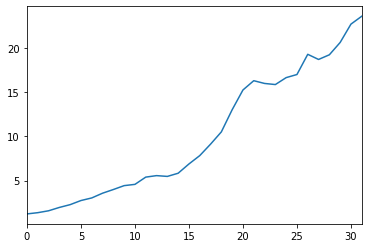

In [ ]:
df.loc[:,'Y'].plot()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### **STATA files**

The top-level function `read_stata` will read a DTA file and return either a DataFrame or a **StataReader** that can be used to read the file incrementally.

We are going to load the `broiler.dta` file into a pandas `DataFrame` using the `read_stata` method.

In [ ]:
!cat broiler.dta

K/=\C  4C  �B @�D33�A �wF33�B33�B  �BRؼBff�B�KÕ^C  LC  �B `�D33B �{Fff�B33�B  �B�
�B33�B	�&KaC  RC  �B ��D��B �zF�̼B���Bff�B���B�̤B��+K۹cC  BC  �B ��D��B $~F  �Bff�B���B[Q�B�̵B�5KL�eC  oC  �B ��D��B  F���B33�B  �BF�B  �B-
D  �B ��Dff0B B�F3�CffC  �B[Q�B33C�w�KV}C �&D  �B  �D  :B ��Ff�C�LC  �B���B�LC�{�K�V�C �DD  �B  �D��@B �F  
C�	C�̹BFfC �C���K��C  CD  �B @�D33CB 6�F�C  C33�B�yC33C���KC  uD  �B `�D��@B |�F33Cf�C  �B�{
CffC}j�K�.�C ��D  �B ��D33CB ��F��C �C �CX.Cf�C�N�K��C `�D  �B ��D  FB ��F �C��C33�B��C � C9O�K�`�C `�D  �B ��D33GB ��F��C �Cff�B� C  #Cd��K=��C ��D  �B ��D��SB ,�F��!C33Cff�B���B��&C���Ko��C @�D  �B  �D��TB ��Ff�"C�C�̘B   33,C��K�>�C ��D  �B  �D��WB �F  (C � C���B   �1C   V.�C  �D  �B

In [ ]:
df = pd.read_stata('broiler.dta')

In [ ]:
df.head()

,year,q,y,pchick,pbeef,pcor,pf,cpi,qproda,pop,meatex,time
0,1950.0,14.3,7863.0,69.500000,31.200001,59.799999,NaN,24.100000,2628500.0,151.684006,NaN,41.0
1,1951.0,15.1,7953.0,72.900002,36.500000,72.099998,NaN,26.000000,2843000.0,154.287003,NaN,42.0
2,1952.0,15.3,8071.0,73.099998,36.200001,71.300003,NaN,26.500000,2851200.0,156.953995,NaN,43.0
3,1953.0,15.2,8319.0,71.300003,28.500000,62.700001,NaN,26.700001,2953900.0,159.565002,NaN,44.0
4,1954.0,15.8,8276.0,64.400002,27.400000,63.400002,NaN,26.900000,3099700.0,162.391006,NaN,45.0


We can also load the same file from a given URL:

In [ ]:
stata_url = 'http://www.principlesofeconometrics.com/stata/broiler.dta'

In [ ]:
df = pd.read_stata(stata_url)

In [ ]:
df.head()

,year,q,y,pchick,pbeef,pcor,pf,cpi,qproda,pop,meatex,time
0,1950.0,14.3,7863.0,69.500000,31.200001,59.799999,NaN,24.100000,2628500.0,151.684006,NaN,41.0
1,1951.0,15.1,7953.0,72.900002,36.500000,72.099998,NaN,26.000000,2843000.0,154.287003,NaN,42.0
2,1952.0,15.3,8071.0,73.099998,36.200001,71.300003,NaN,26.500000,2851200.0,156.953995,NaN,43.0
3,1953.0,15.2,8319.0,71.300003,28.500000,62.700001,NaN,26.700001,2953900.0,159.565002,NaN,44.0
4,1954.0,15.8,8276.0,64.400002,27.400000,63.400002,NaN,26.900000,3099700.0,162.391006,NaN,45.0


Plot the Consumer Price Index (CPI):

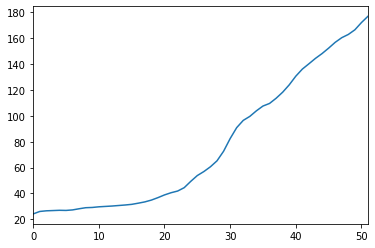

In [ ]:
df.loc[:,'cpi'].plot()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### **Google BigQuery**

Google BigQuery data can be loaded using pandas `read_gbq` method.

This method requires the `pandas-gbq` package and a _BigQuery project_ (you can create a new one from [here](https://console.cloud.google.com/bigquery)).

In [ ]:
!pip install pandas_gbq

In [ ]:
import pandas_gbq

In [ ]:
sql = """
    SELECT name, SUM(number) as count
    FROM `bigquery-public-data.usa_names.usa_1910_current`
    GROUP BY name
    ORDER BY count DESC
    LIMIT 10
"""

pandas_gbq.read_gbq(sql,
                    project_id='MY_PROJECT_ID')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


# **Matplotlib - Plotting basics**

`pandas` integrates with Matplotlib and creating a plot is as simple as:

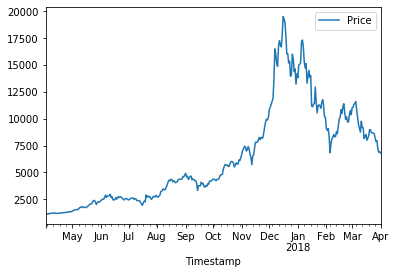

In [ ]:
df.plot()

Behind the scenes, it's using `matplotlib.pyplot`'s interface. We can create a similar plot with the `plt.plot()` function:

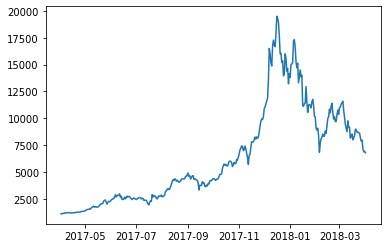

In [ ]:
plt.plot(df.index, df['Price'])

`plt.plot()` accepts many parameters, but the first two ones are the most important ones: the values for the `X` and `Y` axes. Another example:

In [ ]:
x = np.arange(-10, 11)

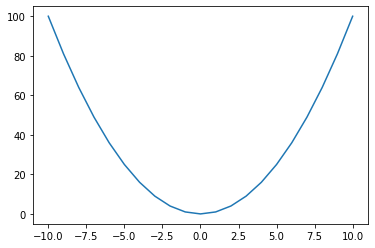

In [ ]:
plt.plot(x, x ** 2)

We're using `matplotlib`'s global API, which is horrible but it's the most popular one. We'll learn later how to use the _OOP_ API which will make our work much easier.

In [ ]:
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Each `plt` function alters the global state. If you want to set settings of your plot you can use the `plt.figure` function. Others like `plt.title` keep altering the global plot:

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

plt.title('My Nice Plot')

Some of the arguments in `plt.figure` and `plt.plot` are available in the pandas' `plot` interface:

In [ ]:
df.plot(figsize=(16, 9), title='Bitcoin Price 2017-2018')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


## **A more challenging parsing**

To demonstrate plotting two columns together, we'll try to add Ether prices to our `df` DataFrame. The ETH prices data can be found in the `data/eth-price.csv` file. The problem is that it seems like that CSV file was created by someone who really hated programmers. Take a look at it and see how ugly it looks like. We'll still use `pandas` to parse it.

In [ ]:
eth = pd.read_csv('data/eth-price.csv')

eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


As you can see, it has a `Value` column (which represents the price), a `Date(UTC)` one that has a string representing dates and also a `UnixTimeStamp` date represeting the datetime in unix timestamp format. The header is read automatically, let's try to parse dates with the CSV Reader:

In [ ]:
eth = pd.read_csv('data/eth-price.csv', parse_dates=True)

print(eth.dtypes)
eth.head()

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object


,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


Seems like the `parse_dates` attribute didn't work. We'll need to add a little bit more customization. Let's divide this problem and focus on the problem of "date parsing" first. The simplest option would be to use the `UnixTimeStamp` column. The `pandas` module has a `to_datetime` function that converts Unix timestamps to Datetime objects automatically:

In [ ]:
pd.to_datetime(eth['UnixTimeStamp']).head()

0   1970-01-01 00:00:01.491091200
1   1970-01-01 00:00:01.491177600
2   1970-01-01 00:00:01.491264000
3   1970-01-01 00:00:01.491350400
4   1970-01-01 00:00:01.491436800
Name: UnixTimeStamp, dtype: datetime64[ns]

The problem is the precision of unix timestamps. To match both columns we'll need to use the same index and, our `df` containing Bitcoin prices, is "per day":

In [ ]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


We could either, remove the precision of `UnixTimeStamp` or attempt to parse the `Date(UTC)`. Let's do String parsing of `Date(UTC)` for fun:

In [ ]:
pd.to_datetime(eth['Date(UTC)']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Date(UTC), dtype: datetime64[ns]

That seems to work fine! Why isn't it then parsing the `Date(UTC)` column? Simple, the `parse_dates=True` parameter will instruct pandas to parse the index of the `DataFrame`. If you want to parse any other column, you must explicitly pass the column position or name:

In [ ]:
pd.read_csv('data/eth-price.csv', parse_dates=[0]).head()

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23


Putting everything together again:

In [ ]:
eth = pd.read_csv('data/eth-price.csv', parse_dates=True, index_col=0)
print(eth.info())

eth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


We can now combine both `DataFrame`s into one. Both have the same index, so aligning both prices will be easy. Let's first create an empty `DataFrame` and with the index from Bitcoin prices:

In [ ]:
prices = pd.DataFrame(index=df.index)

In [ ]:
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


And we can now just set columns from the other `DataFrame`s:

In [ ]:
prices['Bitcoin'] = df['Price']

In [ ]:
prices['Ether'] = eth['Value']

In [ ]:
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


We can now try plotting both values:

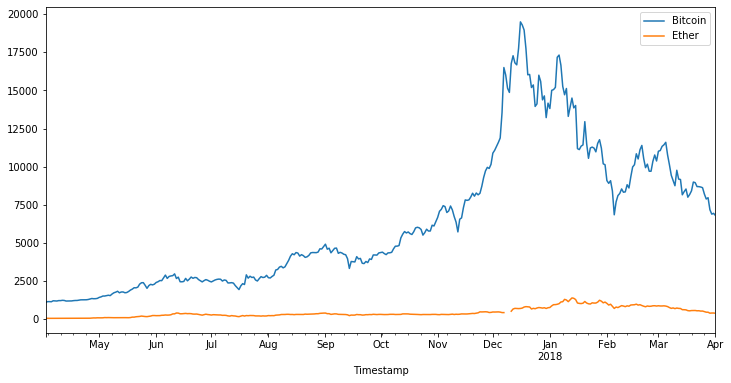

In [ ]:
prices.plot(figsize=(12, 6))

🤔seems like there's a tiny gap between Dec 2017 and Jan 2018. Let's zoom in there:

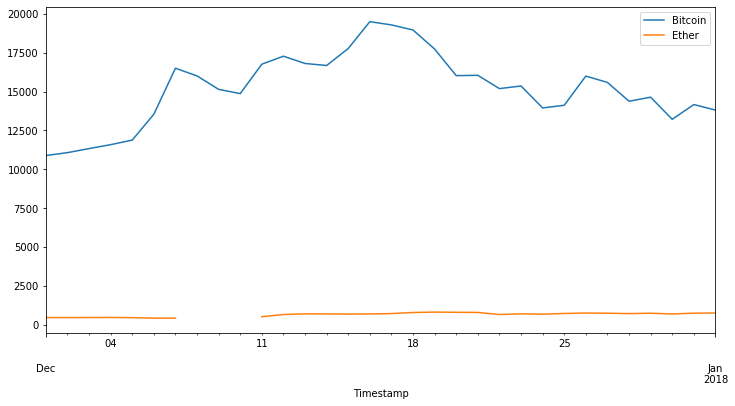

In [ ]:
prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(12, 6))

Oh no, missing data 😱. We'll learn how to deal with that later 😉.

Btw, did you note that fancy indexing `'2017-12-01':'2018-01-01'` 😏. That's pandas power 💪. We'll learn how to deal with TimeSeries later too.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
